# Unsupervised Techniques: Clustering and Topic Models

In [1]:
import codecs, nltk, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
wordnet_lemmatizer = WordNetLemmatizer()

exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string
def text_embedding(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    article_embedd = []
    
    for word in text:
            try:
                embed_word = small_model[word]
                article_embedd.append(embed_word)
            except KeyError:
                continue

    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    
    # the output is a doc-embedding
    return avg


# input should be a string
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # pos tagger
    text = nltk.pos_tag(text)

    # lemmatizer
    text = [wordnet_lemmatizer.lemmatize(token.lower(),"v")if "V" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
    
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]
    
    text = " ".join(text)
    
    # the output is text
    return text

In [3]:

small_model = gensim.models.KeyedVectors.load_word2vec_format('/Users/Ashrakat/Desktop/small-embeddings.txt', binary=False)

# Brifely about Word-embeddings

- Identify similarities between words
- By checking words in the vector space, word-embedding models can check analogies


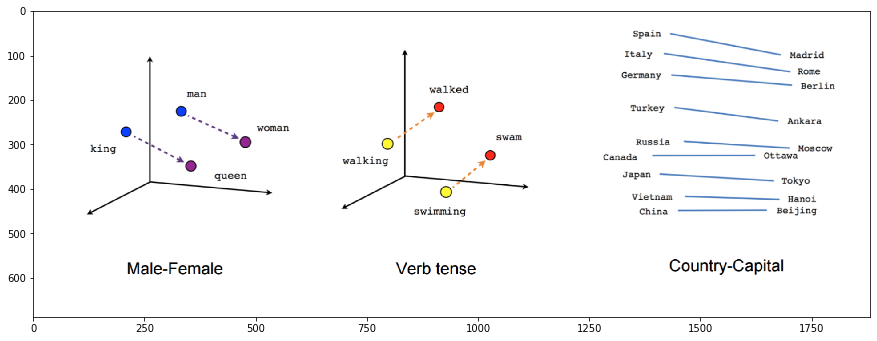

In [4]:
image = mpimg.imread("/Users/Ashrakat/Desktop/embedding.png")
plt.gcf().set_size_inches(15, 15)
plt.imshow(image)
plt.show()

Check this link out!
https://anvaka.github.io/pm/#/galaxy/word2vec-wiki?cx=-3284&cy=-7937&cz=3838&lx=-0.1558&ly=0.8739&lz=0.3926&lw=0.2406&ml=300&s=1.75&l=1&v=d50_clean

In [5]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

#from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

#define function to display scappterplot
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


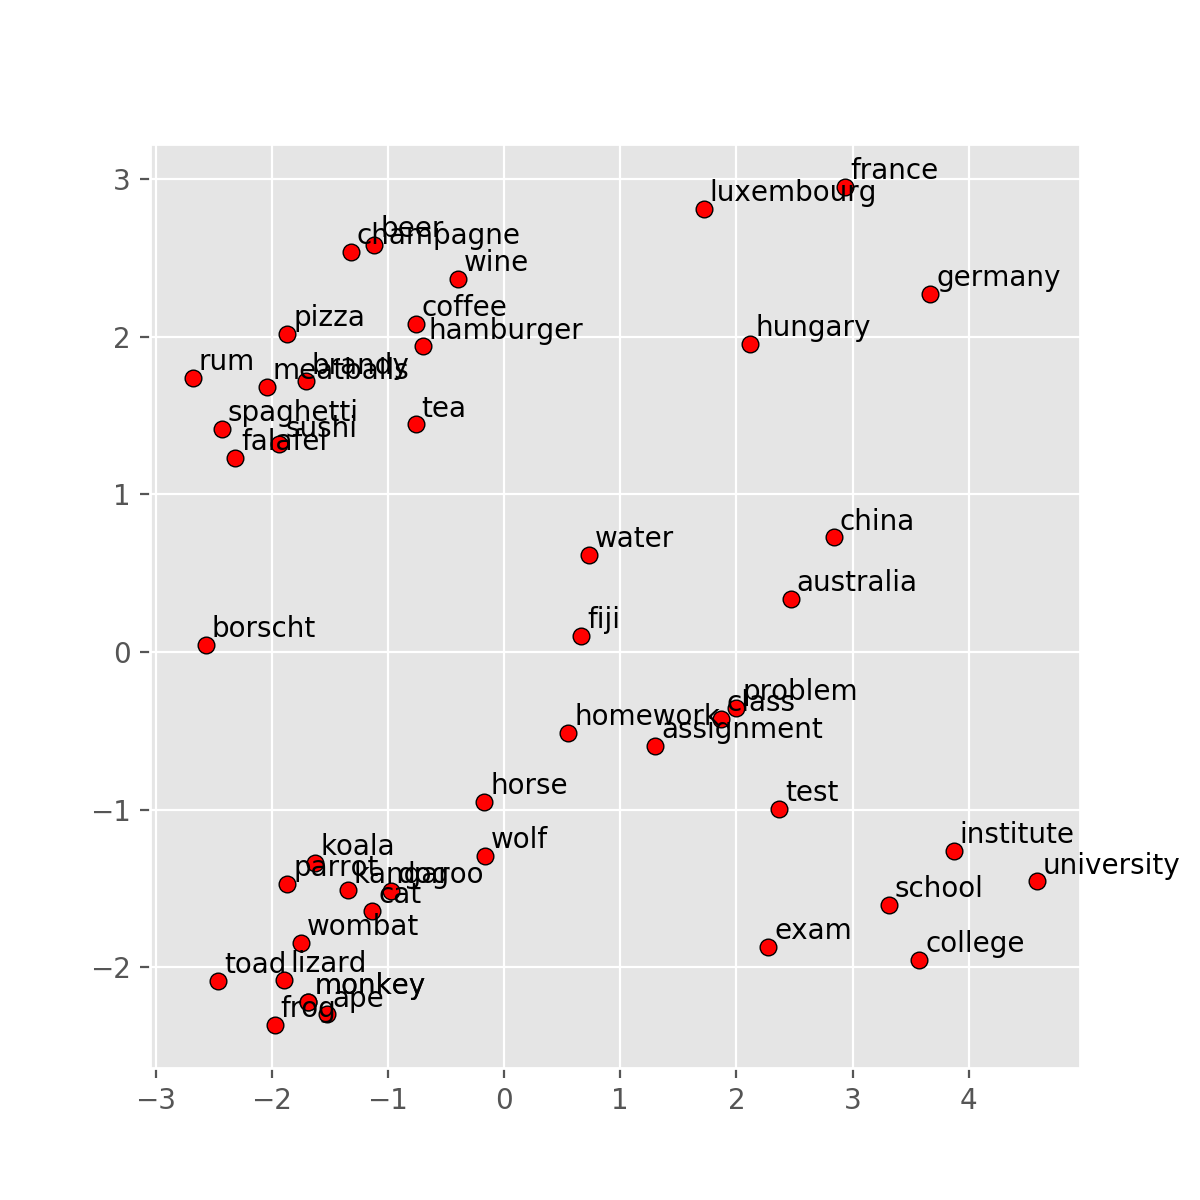

In [6]:
display_pca_scatterplot(small_model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

<IPython.core.display.Javascript object>


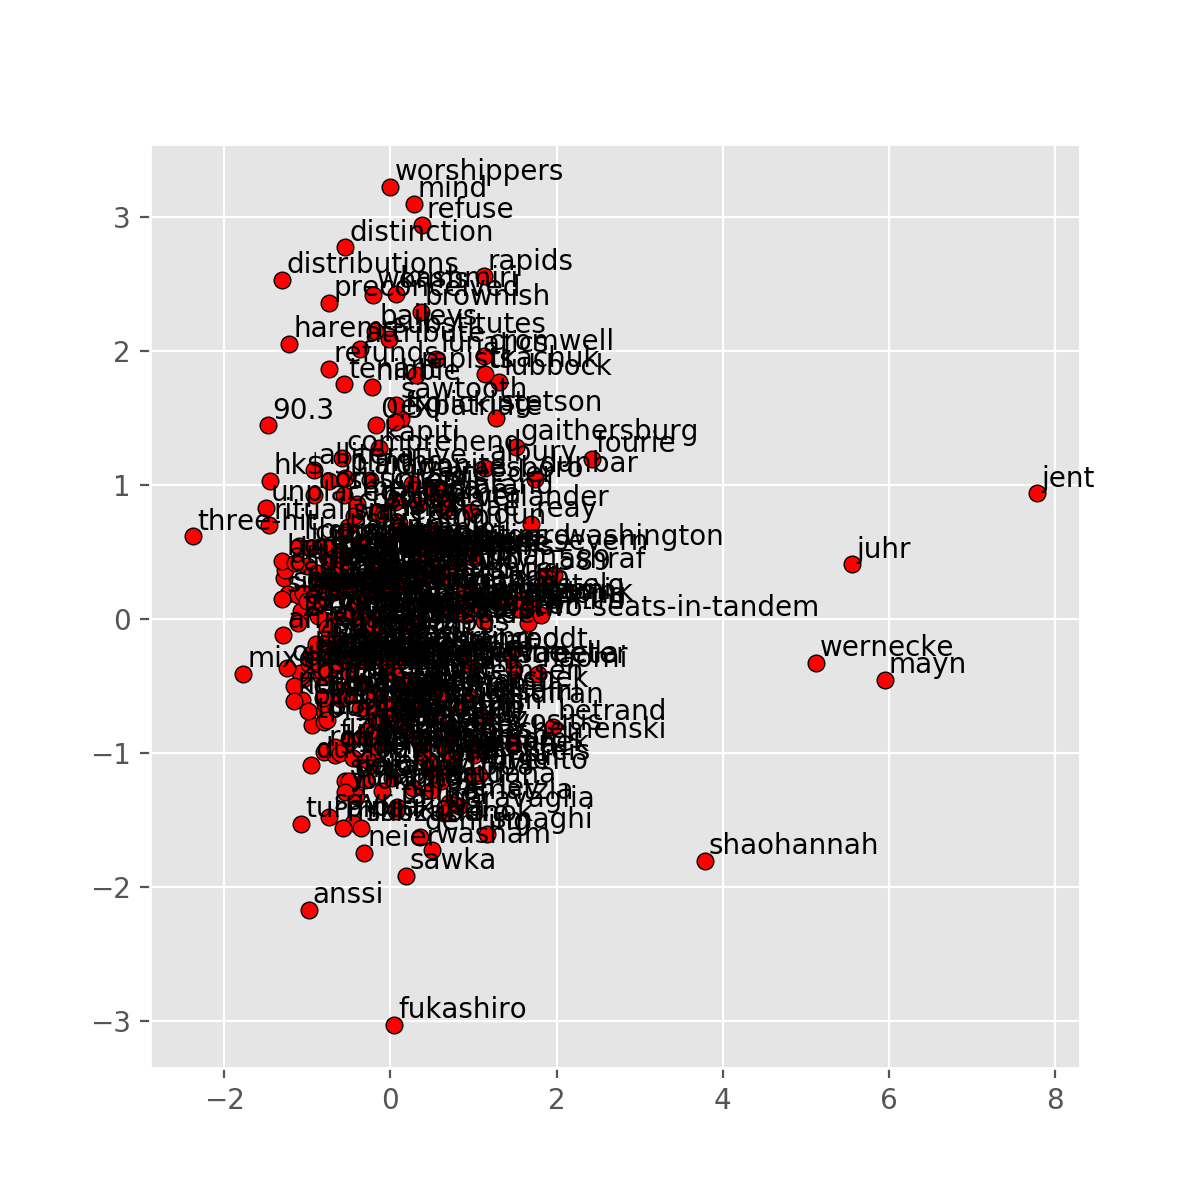

In [7]:
display_pca_scatterplot(small_model, sample=300)


# Clustering (k-means)

 - Unsupervised learning method 
 - partition n observations (i.e., documents) into k clusters 
 - in which each observation belongs to the cluster with the nearest mean.


### What is a cluser

-  Cluster refers to a collection of data points aggregated together because of certain similarities.

### How does k-means work?

- Assigning subgroups in your data - see to which subgroup your data belings
- You assign a target number k which will refer to the number of centroid needed in the dataset
- A centroid will be the real location of the center of a cluster
- Data points is allocated to each of the clusters through reducing the in-cluster sum of squares. 

### What could be issues?

- Very coarse-grained (1 doc - 1 cluster)
- Numbers of clusters have to be assigned in advance
- Difficult to evaluate


### Example with random data

In [ ]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# create blobs - helps us generate data samples or datasets
# you can also use instead the np.random.rand to create random samples
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# create np array for data points
points = data[0]

# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.gcf().set_size_inches(7, 7)
plt.show()

## k-means

In [ ]:
from sklearn.cluster import KMeans 


X,y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)


kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

## let's try to cluster articles


In [104]:
# i'm re-loading everything here, because I want to use the titles of the articles to interpret the clusters
dataset = codecs.open("/Users/Ashrakat/Desktop/rt_dataset.tsv", "r", "utf-8").read().strip().split("\n")

article = dataset[4].split("\t")

corpus = []
titles =  []

# you can run wit all data at home
for line in dataset[1:1000]:
    # to better understands which clusters are created, let's check the titles of the articles
    title = line.split("\t")[1]
    text = line.split("\t")[3]
    text = text_embedding(text)
    
    if len(text)>0:
        corpus.append(text)
        titles.append(title)
print ("ready!")

ready!


In [105]:
dataset

['date \ttitle \ttopic \tcontent',
 '16 Sep, 2016 14:08 \tPutin: We don’t approve of WADA hackers, but information they leaked raises questions\tnews\t"We don’t approve of what hackers do, but what they’ve done is definitely of interest to the international community, especially the sports community,” the Russian president said, as cited by RIA Novosti. “It raises a lot of questions. It turns out that healthy athletes legally take medications that are prohibited for others, and the people who obviously suffer from serious illnesses and severe disabilities are being banned from the Paralympics only on suspicion of using some kind of drugs,” he added. Earlier this week, hacktivists from the cyber group ‘Fancy Bears’ released files revealing that top world athletes had received the green light from WADA to take banned substances. Prominent US sports stars - including tennis players Serena and Venus Williams, multiple Olympic gymnastics champion Simone Biles, and basketball player Elena De

In [106]:
from sklearn.cluster import KMeans

# usual thing, np arrays
X = np.array(corpus)
y = np.array(titles) 

# we define kmeans, with 10 clusters (you can change this number and see how the results change)
# then we train it using only the documents
kmeans = KMeans(n_clusters=10).fit(X)

In [107]:
# these are the labels we obtain
kmeans.labels_

array([6, 2, 1, 4, 6, 5, 9, 3, 4, 9, 2, 2, 4, 7, 4, 8, 6, 3, 2, 4, 5, 0,
       0, 5, 5, 5, 4, 1, 4, 4, 7, 4, 3, 4, 2, 4, 2, 3, 3, 6, 7, 5, 2, 0,
       3, 9, 3, 4, 1, 6, 4, 0, 3, 2, 5, 5, 2, 5, 5, 0, 5, 3, 8, 6, 6, 8,
       5, 5, 0, 1, 2, 5, 4, 3, 5, 4, 4, 3, 1, 0, 3, 5, 5, 4, 5, 5, 5, 7,
       4, 2, 7, 9, 5, 4, 7, 4, 6, 4, 5, 7, 5, 2, 7, 9, 0, 0, 1, 4, 5, 5,
       2, 5, 5, 4, 5, 3, 0, 8, 6, 3, 4, 2, 4, 3, 4, 4, 8, 5, 4, 5, 2, 7,
       1, 0, 1, 2, 0, 5, 0, 6, 4, 7, 2, 3, 4, 3, 5, 0, 0, 4, 8, 2, 1, 5,
       4, 5, 4, 4, 7, 6, 3, 9, 5, 2, 8, 0, 8, 4, 2, 1, 6, 0, 7, 5, 4, 5,
       1, 2, 8, 1, 3, 2, 4, 5, 3, 1, 1, 4, 5, 4, 0, 5, 8, 0, 1, 4, 7, 1,
       4, 0, 7, 7, 4, 0, 3, 7, 2, 5, 7, 2, 9, 5, 5, 6, 2, 1, 1, 5, 8, 3,
       0, 2, 5, 4, 6, 5, 3, 2, 8, 5, 2, 2, 4, 5, 3, 5, 9, 3, 2, 3, 2, 0,
       4, 4, 2, 0, 4, 2, 2, 7, 6, 7, 5, 7, 5, 9, 8, 4, 3, 0, 8, 5, 3, 4,
       2, 9, 6, 3, 4, 0, 0, 8, 5, 0, 5, 3, 5, 7, 2, 3, 1, 0, 3, 5, 7, 7,
       5, 2, 1, 3, 8, 4, 3, 3, 2, 5, 1, 4, 1, 3, 8,

In [108]:
# to see which docs are in which clusters, we need to loop over all labels

# so the number of clusters
for i in range(10):
    # print the title of the document if the doc is in this cluster
    print ("this is cluster number",i)
    # then you loop over all titles
    for k in range(len(titles)):
        
        # this is the title
        title = titles[k]
        
        #this is its cluster label
        label = kmeans.labels_[k]
        
        # does it belong to this cluster?
        if i == label:
            #if yes, then print it out!
            print (title)
    print (" ")

this is cluster number 0
‘Human remains everywhere’: Family of 11 killed in alleged Saudi coalition strike in Yemen
Indonesia snubs Saudi ‘anti-terror’ coalition... then its capital gets hit
Greece to raze Idomeni refugee camp, relocate migrants to ‘hospitality areas’
Radovan Karadzic deserves punishment - but what about the Neocons?
Paper war: N. Korea spams South with 1mn propaganda leaflets in response to border loudspeakers
Iraqi torture: US unable to restrain Shia militia forces committing kidnap, torture & beheadings
Taliban’s massive truck bomb attack & gunfight at Kabul hotel ends with 1 policeman, 3 gunmen dead
Two US Navy boats in Iranian custody - Pentagon
Dresden rally protests deportation of Afghan asylum seekers
‘Americans are on our side’: Al-Nusra commander says US arming jihadists via 3rd countries
Syrian Army forces retake key town in Hama province
Tear gas as anti-curfew protesters clash with police in Turkey
Russian airstrike killed senior ISIS leader Abu Muhammad a

Ax-wielding Afghan teen attacks German railway passengers
Olympic gold medal winning swimmer Mack Horton thanks fan who alerted him to cancer threat
Baton Rouge shooting: 3 police dead & 3 injured, shooter dead – LA superintendent
NY attorney general announces investigation into Syracuse shooting
‘I saw the puddle of blood’: 15yo girl commits suicide over nude Snapchat pic
Sale of swastika-covered Corvette hits the skids on Craigslist
Dutch journalist held in Turkey over Erdogan tweets says her Amsterdam flat was burgled
Candlelit vigil for slain Baton Rouge officers
GTMO 2016: Special report on the future of the detainment camp
Protests shut down streets in DC to demand justice for Terrence Sterling (VIDEO)
96 y/o Dr Heimlich uses his own maneuver for 1st time to save choking woman
Keith Scott autopsy shows Charlotte police shot him 4 times, family says first in the back – report
Four men thrown off flight tell RT Thomas Cook is scapegoating 'bearded Asians'
‘He can’t read or write, o

In [110]:
 #let's count which are the most popular words in the titles of each cluster
from collections import Counter

for i in range(10):
    
    # we create a list where we put the words from the titles
    title_words = []
    
    print ("this is cluster number",i)
    for k in range(len(titles)):
        # we clean the title with our pipeline
        title = nlp_pipeline(titles[k]).split(" ")
        label = kmeans.labels_[k]
        if i == label:
            # we put each word in the list
            for word in title:
                title_words.append(word)
    
    # then we count and print the 10 most common
    most_common = Counter(title_words).most_common(10)
    print (most_common)
    print (" ")

this is cluster number 0
[(('syrian', 'JJ'), 16), (('isis', 'NN'), 13), (('us', 'PRP'), 11), (('video', 'NN'), 10), (('forces', 'NNS'), 9), (('turkey', 'NN'), 7), (('army', 'NN'), 6), (('police', 'NNS'), 6), (('russian', 'JJ'), 6), (('thousands', 'NNS'), 6)]
 
this is cluster number 1
[(('video', 'NN'), 20), (('space', 'NN'), 5), (('new', 'JJ'), 5), (('first', 'JJ'), 5), (('life', 'NN'), 4), (('solar', 'JJ'), 4), (('incredible', 'JJ'), 4), (('photo', 'NN'), 4), (('could', 'MD'), 4), (('scientists', 'NNS'), 3)]
 
this is cluster number 2
[(('russian', 'JJ'), 14), (('russia', 'NN'), 9), (('us', 'PRP'), 8), (('report', 'NN'), 6), (('probe', 'NN'), 5), (('uk', 'JJ'), 5), (('court', 'NN'), 5), (('british', 'JJ'), 4), (('laws', 'NNS'), 4), (('billion', 'CD'), 4)]
 
this is cluster number 3
[(('video', 'NN'), 17), (('police', 'NNS'), 13), (('man', 'NN'), 7), (('police', 'NN'), 7), (('dead', 'JJ'), 7), (('isis', 'NN'), 6), (('shooting', 'VBG'), 5), (('black', 'JJ'), 5), (('photos', 'NNS'), 5),

### For all of my mean girls fans out there! 

In [ ]:
image = mpimg.imread("/Users/Ashrakat/Desktop/kmeangirls.png")
plt.gcf().set_size_inches(11, 11)
plt.imshow(image)
plt.show()

# Topic Modelling

### Instead of assigning each document to a single cluster
### The goal is to identify the underlying topics of each document and group them consequently.

- In k-means clustering, each observation—for our purposes, each document—can be assigned to one, and only one, cluster. 
- Topic models, however, are mixture models. This means that each document is assigned a probability of belonging to a latent theme or “topic.”



### What are these topics?

- Groups of tokens that are likely to appear in the same context 
- Topics explain co-occurrences of words in documents with sets of semantically related words, called topics. 
- A hidden structure that determines how tokens appear in the corpus

### Latent Dirichlet Allocation (Gibbs sampling)

**Determine the probability that each document is associated with a given theme or topic.**

**The distribution of topics in documents and distribution of words in topics have a Dirichlet prior **


1. Inizialize topic assignments randomly (choose k topics, very difficult and consequential decision)
  * Words are assigned randomly to opics
  
2. For each iteration
 * For each document
 * For each word re-assign topic to word, given:
 
    - all other words in the doc and their topic-assignment (dirichlet prior) - prevelance of word in a doc
    - all other occurrences of the same word in other docs (dirichlet prior)


## Outputs:

1. Words - associated with the k topics
2. Documents - associated with k topics

In [ ]:
image = mpimg.imread("/Users/Ashrakat/Desktop/topics.png")
plt.gcf().set_size_inches(11, 11)
plt.imshow(image)
plt.show()

Source: Blei, David M. "Probabilistic topic models." Communications of the ACM 55.4 (2012): 77-84.

## Use carefully!

- sometimes unituitive
- hard to interpret often
- "making educated guesses about how words cohere into different latent themes by identifying patterns in the way they co-occur within documents." - Chris Bail

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # pos tagger
    text = nltk.pos_tag(text)

    # lemmatizer
    text = [wordnet_lemmatizer.lemmatize(token.lower(),"v")if "V" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
    
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]
        
    # the output is text
    return text

In [ ]:
#topic models, finally!

import codecs, os


content = []
doc = open("/Users/Ashrakat/Desktop/sascat_excerpt.tsv","r").read().strip().split("\n")
for line in doc[2:]:
            sent = line.split("\t")[10]
            sent = nlp_pipeline(sent)
            if len(sent)>1:
                content.append(sent)


In [ ]:
content

In [ ]:
from gensim import corpora, models

# for running LDA in gensim we need a dictionary of all the words
dictionary = corpora.Dictionary(content)

# and to count the word frequency in each doc
X = [dictionary.doc2bow(text) for text in content]

print ("ready!")

In [ ]:
ldamodel = models.ldamodel.LdaModel(X, num_topics=10, id2word = dictionary, iterations=500)
print ("done!")

In [ ]:
for topic in ldamodel.print_topics(num_words=7):
    print (topic)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, X,dictionary)
vis

#saliency = term_proportion * distinctiveness


In [ ]:
# Take a look at what Structural Topic Models are: they employ meta data about the document to improve the assignmnet to topics

# Exercises

**Exercise 1- Topic Modelling **

You will work with US Manifestos - check the folder on Github.

1. Loop over each of the articles in the folder, open it.
2. You need to have a structure of a list of lists, each line is a line in the Manifestos
3. Clean your data with a suitable NLP Pipeline
4. Use LDA for Topic Modelling:
5. What are the main topic in all of your corpus?
6. Do they make sense? Say you want to identify the main sanctions violations as this is a dataset about economic sanctions issued as laws by the US Congress. Would topic modelling work?


In [11]:
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # pos tagger
    text = nltk.pos_tag(text)

    # lemmatizer
    text = [wordnet_lemmatizer.lemmatize(token.lower(),"v")if "V" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
    
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]
        
    # the output is text
    return text

In [12]:
import os
manifesto_quasi_sents = []

for filename in os.listdir("/Users/Ashrakat/Desktop/US-Manifestos/"):
    if ".txt" in filename:
        doc = open("/Users/Ashrakat/Desktop/US-Manifestos/"+filename,"r").read().strip().split("\n")
        for line in doc[2:]:
            sent = line.split("\t")[0]
            print(sent)
            # for LDA we need tokens not embeddings!
            # be careful, each text-processing step you'll do will influence the analysis
            
            sent = nlp_pipeline(sent)
            if len(sent)>1:
                manifesto_quasi_sents.append(sent)
            
            
print ("ready!")

"As we come together to declare our vision as Democrats, we are mindful that the challenges of our times are new and profound."
"This November, the choice we face as Americans may have more impact on our people and our place in the world than any in our lifetimes."
"We approach this task with a seriousness that matches the challenges before us, but also with a profound optimism about our future - an optimism that springs from our great faith in America, and our great pride in what it means to be Americans."
"We know the stakes are immeasurably high."
"For the first time in generations, we have been attacked on our own shores."
"Our brave men and women in uniform are still in harm's way in Iraq, Afghanistan, and the war against terror."
"Our alliances are frayed, our credibility in doubt."
"Our great middle class is hard-pressed."
"Millions of Americans have lost their jobs, and millions more are struggling under the mounting burden of life's everyday costs."
"In Washington, the Preside

"It requires the ability and willingness to direct immediate, effective military action when the capture or destruction of terrorist groups and their leaders is possible;"
"a massive improvement in intelligence gathering and analysis coupled with vigorous law enforcement;"
"a relentless effort to shut down the flow of terrorist funds;"
"a global effort to prevent failed or failing states that can become sanctuaries for terrorists;"
"a sustained effort to deny terrorists any more recruits by conducting effective public diplomacy;"
"and a sustained political and economic effort to improve education,"
"work for peace,"
"support democracy and extend hope."
"Improving intelligence to find and stop terrorists."
"We will train and equip the military to enhance its capabilities to seek out and destroy terrorists."
"We will strengthen the capacity of intelligence and law enforcement around the world by forging stronger international coalitions to provide better information and communication."
"

"Ignoring the advice of military leaders, this Administration did not send sufficient forces into Iraq to accomplish the mission."
"And this Administration went into Iraq without a plan to win the peace."
"Now this Administration has been forced to change course in order to correct this fundamental mistake."
"They are now taking up the suggestions that many Democrats have been making for over a year."
"And they must - because having gone to war, we cannot afford to fail at peace."
"We cannot allow a failed state in Iraq that inevitably would become a haven for terrorists and a destabilizing force in the Middle East."
"And we must secure more help from an international community that shares a huge stake in helping Iraq become a responsible member of that community, not a breeding ground for terror and intolerance."
"As a first step, we must create a stable and secure environment in Iraq."
"To do this right, we must truly internationalize both politically and militarily: we cannot depend

"And we will work with poor countries to help stabilize and diversify their economies, including through the consideration of sensible debt relief measures where appropriate."
"We will support efforts to reach universal basic education and the other Millennium Development Goals."
"Supporting America's foreign affairs community."
"We are committed to the best training, facilities and support for America's diplomats, the men and women of America's foreign affairs community, who represent our country and work to promote our values around the world."
"STRENGTHENING OUR MILITARY"
"We need a new military to meet the new threats of the 21st Century."
"Today's American military is the best in the world, but tomorrow's military must be even better."
"It must be stronger, faster, better armed, and never again stretched so thin."
"John Kerry, John Edwards and the Democratic Party will send a clear message to every man and woman in our armed forces: We guarantee that you will always be the best-le

"We will cut the federal government's energy use and challenge local governments, corporations, universities, small businesses and hospitals to do the same."
"Our commitment to conservation."
"A balanced energy policy must create real incentives for energy conservation in our homes, our offices, our factories, and our infrastructure, saving money and improving security even as it creates good jobs and rebuilds our communities."
"With sixty-five percent of the world's oil reserves in the Middle East, we cannot drill our way to energy independence."
"But we can create, think, imagine, and invent our way there."
"And we will create jobs, help our environment, and build a stronger country as we do."
"STRENGTHENING HOMELAND SECURITY"
"The first and foremost responsibility of government is to protect its citizens from harm."
"Unfortunately, Washington today is not doing enough to make America safe."
"We have made some progress since the terrible attacks of September 11th."
"We have taken ste

"We believe Americans are the smartest, toughest competitors in the world."
"Our products and ideas can compete and win anywhere, as long as we're given a fair chance."
"And our companies can keep and create jobs in America without sacrificing competitiveness."
"We will fight for American jobs and we will fight for American workers."
"Under John Kerry and John Edwards, we will revive America's manufacturing sector, create new jobs and protect existing ones by ending tax breaks for companies that ship jobs overseas and cutting taxes for companies that create jobs here at home; by fighting for free, fair and balanced trade; by encouraging investment in small businesses and helping companies deal with rising health care costs;"
"by promoting new technologies, like energy, that will lead to the companies and jobs of tomorrow;"
"and by ensuring that people of every age learn the skills to succeed in today's economy."
"Tax reform to create jobs."
"Today's tax law provides big breaks for comp

"It is a compact across the generations that has helped tens of millions of Americans live their retirement years in dignity instead of poverty."
"Democrats believe in the progressive, guaranteed benefit that has ensured that seniors and people with disabilities receive a benefit not subject to the whims of the market or the economy."
"We oppose privatizing Social Security or raising the retirement age."
"We oppose reducing the benefits earned by workers just because they have also earned a benefit from certain public retirement plans."
"We will repeal discriminatory laws that penalize some retired workers and their families while allowing others to receive full benefits."
"Because the massive deficits under the Bush Administration have raided hundreds of billions of dollars from Social Security, the most important step we can take to strengthen Social Security is to restore fiscal responsibility."
"Social Security matters to all Americans, Democrats and Republicans, and strengthening 

"We will also support prevention of illness through better nutrition and exercise."
"Investing in science to battle disease."
"We will push the boundaries of science in search of new medical therapies and cures."
"The Bush Administration has put ideology over science, skewing information about everything from women's health to scientific research."
"Americans deserve access to the best evidence available about illnesses, therapies, and cures."
"From new therapies to prolong life for people with AIDS, to new openings in the battle to cure cancer, the possibilities of medical research fill us with hope."
"We will secure more funding for aggressive biomedical research seeking affordable and effective therapies based on real science."
"President Bush has rejected the calls from Nancy Reagan, Christopher Reeve and Americans across the land for assistance with embryonic stem cell research."
"We will reverse his wrongheaded policy."
"Stem cell therapy offers hope to more than 100 million Amer

"And even though overwhelming scientific evidence shows that global climate change is a scientific fact, this administration has rewritten government reports to hide that fact."
"John Kerry, John Edwards and the Democratic Party believe in a stronger, safer, healthier America."
"A strong America depends on healthy families, and healthy families depend on fresh air, pure water, and clean neighborhoods."
"These are our commitments: we will make our air cleaner and our water purer."
"We will ensure our children can safely play in our neighborhoods, our families can enjoy our national parks, and our sportsmen can hunt and fish in our lakes and forests."
"We will foster a healthy economy and a healthy environment by promoting new technologies that create good jobs and improve our world."
"And we will work with our allies to achieve these goals and to protect the global environment, for this generation and future generations."
"We reject the false choice between a healthy economy and a healt

"We will defend the dignity of all Americans against those who would undermine it."
"Because we believe in the privacy and equality of women, we stand proudly for a woman's right to choose, consistent with Roe v. Wade, and regardless of her ability to pay."
"We stand firmly against Republican efforts to undermine that right."
"At the same time, we strongly support family planning and adoption incentives."
"Abortion should be safe, legal, and rare."
"Racial and religious profiling is wrong and we will work to stamp it out."
"Hate crimes desecrate sacred spaces and demean good people, and we support a strong national law to punish them."
"We will extend the promise of citizenship to those still struggling for freedom."
"Today's immigration laws do not reflect our values or serve our security, and we will work for real reform."
"The solution is not to establish a massive new status of second-class workers; that betrays our values and hurts all working people."
"Undocumented immigrants wit

"What makes America great has never been its perfection, but the belief that it can be made better."
"And that people who love this country can change it."
"This is the country of Abraham Lincoln, Susan B. Anthony, Martin Luther King Jr., Cesar Chavez, and Rosa Parks – people who had the audacity to believe that their country could be a better place, and the courage to work to make it so."
"And this Party has always made the biggest difference in the lives of the American people when we summoned the entire nation to a common purpose."
"We have a choice to make."
"We can choose to stay the current failed course."
"Or we can choose a path that builds upon the best of who and what we are, that reflects our highest values."
"We can have more of the last eight years, or we can rise together and create a new kind of government."
"The time for change has come, and America must seize it."
"I. Renewing the American Dream"
"For months the state of our economy has dominated the headlines–and the 

"We will ensure that Americans can benefit from healthy environments that allow them to pursue healthy choices."
"Additionally, as childhood obesity rates have more than doubled in the last 30 years, we will work to ensure healthy environments in our schools."
"We must fight HIV/AIDS in our country and around the world."
"We support increased funding into research, care and prevention of HIV/AIDS."
"We support a comprehensive national strategic plan to combat HIV/AIDS and a Ryan White Care Act designed and funded to meet today’s epidemic, that ends ADAP waiting lists and that focuses on the communities such as African Americans and Latino Americans who are disproportionately impacted through an expanded and renewed minority HIV/AIDS initiative, and on new epicenters such as the Southern part of our nation."
"We support providing Medicaid coverage to more low-income HIV-positive Americans."
"Health care reform must also provide adequate incentives for innovation to ensure that Americans

"We have produced the first woman Secretary of State, the first woman Speaker of the House of Representatives, and, in 2008, Hillary Rodham Clinton, the first woman in American history to win presidential primaries in our nation."
"We believe that our daughters should have the same opportunities as our sons; our party is proud that we have put eighteen million cracks in the highest glass ceiling."
"We know that when America extends its promise to women, the result is increased opportunity for families, communities, and aspiring people everywhere."
"When women still earn 76 cents for every dollar that a man earns, it doesn’t just hurt women; it hurts families and children."
"We will pass the “Lilly Ledbetter” Act, which will make it easier to combat pay discrimination; we will pass the Fair Pay Act; and we will modernize the Equal Pay Act."
"We will invest in women-owned small businesses and remove the capital gains tax on startup small businesses."
"We will support women in math and sc

"At community colleges and training programs across the country, we will invest in short-term accelerated training and technical certifications for the unemployed and under-employed to speed their transition to careers in high-demand occupations and emerging industries."
"We will reward successful community colleges with grants so they can continue their good work."
"We support education delivery that makes it possible for non-traditional students to receive support and encouragement to obtain a college education, including Internet, distance education, and night and weekend programs."
"We must also invest in training and education to prepare incumbent job-holders with skills to meet the rigors of the new economic environment and provide them access to the broad knowledge and concrete tools offered by apprenticeships, internships, and postsecondary education."
"We need to fully fund joint labor-management apprenticeship programs and reinvigorate our industrial crafts programs to train 

"We will pass a Homebuyers Bill of Rights, which will include establishing new lending standards to ensure that loans are affordable and fair, provide adequate remedies to make sure the standards are met, and ensure that homeowners have accurate and complete information about their mortgage options."
"We will support affordable rental housing, which is now more critical than ever."
"We will implement the newly created Affordable Housing Trust Fund to ensure that it can start to support the development and preservation of affordable housing in mixed-income neighborhoods throughout the country, restore cuts to public housing operating subsidies, and fully fund the Community Development Block Grant program."
"We will work with local jurisdictions on the problem of vacant and abandoned housing in our communities."
"We will work to end housing discrimination and to ensure equal housing opportunity."
"We will combat homelessness and target homelessness among veterans in particular by expandi

"Barack Obama will focus this strategy on seven goals: (i) ending the war in Iraq responsibly;"
"(ii) defeating Al Qaeda and combating violent extremism;"
"(iii) securing nuclear weapons and materials from terrorists;"
"(iv) revitalizing and supporting our military;"
"(v) renewing our partnerships to promote our common security;"
"(vi) advancing democracy and development;"
"and (vii) protecting our planet by achieving energy security and combating climate change."
"Ending the War in Iraq"
"To renew American leadership in the world, we must first bring the Iraq war to a responsible end."
"Our men and women in uniform have performed admirably while sacrificing immeasurably."
"Our civilian leaders have failed them."
"Iraq was a diversion from the fight against the terrorists who struck us on 9-11, and incompetent prosecution of the war by civilian leaders compounded  the strategic blunder of choosing to wage it in the first place."
"We will re-center American foreign policy by responsibly

"We will also build greater capacity to mitigate the consequences of bio-terror attacks, ensuring that the federal government does all it can to get citizens the information and resources they need to help protect themselves and their families."
"We will accelerate the development of new medicines, vaccines, and production capabilities, and lead an international effort to detect and diminish the impact of major infectious disease epidemics."
"And we will fully fund our contribution to the Organization for the Prohibition of Chemical Weapons and work to ensure that remaining stockpiles of chemical weapons are destroyed swiftly, safely, and securely."
"Stronger Cyber-Security"
"We will work with private industry, the research community and our citizens, to build a trustworthy and accountable cyber-infrastructure that is resilient, protects America’s competitive advantage, and advances our national and homeland security."
"Revitalizing and Supporting the Military, Keeping Faith With Veter

"We recognize Africa’s promise as a trade and investment partner and the importance of policies that can contribute to sustainable economic growth, job creation, and poverty alleviation."
"We are committed to bringing the full weight of American leadership to bear in unlocking the spirit of entrepreneurship and economic independence that is sweeping across markets of Africa."
"We believe that sustainable economic growth and development will mitigate and even help to reverse such chronic and debilitating challenges as poverty, hunger, conflict, and HIV/AIDS."
"We are committed to bringing the full weight of American leadership to bear to work in partnership with Africa to confront these crises."
"We will work with the United Nations and Africa’s regional organizations to prevent and resolve conflict and to build the capacity of Africa’s weak and failing states."
"We must respond effectively when there is a humanitarian crisis–particularly at this moment in Sudan where genocide persists 

"The U.N. Secretariat’s management practices remain inadequate."
"Peacekeeping operations are overextended."
"The new U.N. Human Rights Council remains biased and ineffective."
"Yet none of these problems will be solved unless America rededicates itself to the organization and its mission."
"We support reforming key global institutions —such as the U.N. Security Council and the G- 8—so they will be more reflective of 21 st century realities."
"Advancing Democracy, Development, and Respect for Human Rights"
"No country in the world has benefited more from the worldwide expansion of democracy than the United States."
"Democracies are our best trading partners, our most valuable allies, and the  nations with which we share our deepest values."
"The United States must join with our democratic partners around the world to meet common security challenges and uphold our shared values whenever they are threatened by autocratic practices, coups, human rights abuses, or genocide."
"Build Democra

"This will more than offset the amount of oil we are expected to import from OPEC nations in 2030."
"Lead to Combat Climate Change"
"We will lead to defeat the epochal, man-made threat to the planet: climate change."
"Without dramatic changes, rising sea levels will flood coastal regions around the world."
"Warmer temperatures and declining rainfall will reduce crop yields, increasing conflict, famine, disease, and poverty."
"By 2050, famine could displace more than 250 million people worldwide."
"That means increased instability in some of the most volatile parts of the world."
"Never again will we sit on the sidelines, or stand in the way of collective action to tackle this global challenge."
"Getting our own house in order is only a first step."
"We will invest in efficient and clean technologies at home while using our assistance policies and export promotions to help developing countries preserve biodiversity, curb deforestation, and leapfrog the carbonenergy-intensive stage of de

"We will treat our national parks with the same respect that millions of families show each year when they visit."
"We will recognize that our parks are national treasures, and will ensure that they are protected as part of the overall natural system so they are here for generations to come."
"We are committed to conserving the lands used by hunters and anglers, and we will open millions of new acres of land to public hunting and fishing."
"Metropolitan and Urban Policy"
"We believe that strong cities are the building blocks of strong regions, and strong regions are essential for a strong America."
"To build vibrant and diverse cities and regions, we support equitable development strategies that create opportunities for those traditionally left behind by economic development efforts."
"For the past eight years, the current Administration has ignored urban areas."
"We look forward to greater partnership with urban America."
"We will strengthen federal commitment to cities, including by 

"We all have to do our part to lift up this country, and that means changing hearts and changing minds, and making sure that every American is treated equally under the law."
"We will restore professionalism over partisanship at the Department of Justice, and staff the civil rights division with civil rights lawyers, not ideologues."
"We will restore vigorous federal enforcement of civil rights laws in order to provide every American an equal chance at employment, housing, health, contracts, and pay."
"We are committed to banning racial, ethnic, and religious profiling and requiring federal, state, and local enforcement agencies to take steps to eliminate the practice."
"We are committed to ensuring full equality for women: we reaffirm our support for the Equal Rights Amendment, recommit to enforcing Title IX, and will urge passage of the Convention on the Elimination of All Forms of Discrimination Against Women."
"We will pursue a unified foreign and domestic policy that promotes civi

"As a result, states have had to innovate and take matters into their own hands—and they have done an extraordinary job."
"Yet they should not have to do it alone."
"We will provide significant and immediate temporary funding to state and local governments, as well as territories and tribes."
"We will give these governmental entities a partner in the federal government, and a president who understand that prosperity comes not only from Wall Street and Washington, but from the perseverance of the American people."
"County and municipal governments, as well as territories and tribes, are also key partners with the federal government."
"These partnerships need to be revitalized to address their critical needs."
"Partnership with Civic Institutions"
"Social entrepreneurs and leading non-profit organizations are assisting schools, lifting families out of poverty, filling health care gaps, and inspiring others to lead change in their own communities."
"To support these results-oriented innov

"Rebuilding Middle Class Security"
"We’ve come a long way since 2008."
"The President took office in the middle of the worst economic downturn since the Great Depression; that month 800,000 Americans lost their jobs – more than in any single month in the previous 60 years."
"On Day One, he took immediate action to stop the free fall and put Americans back to work. In the midst of the crisis,"
"President Obama knew what Democrats have always known: that American workers are tougher than tough times."
"Since early 2010, the private sector has created 4.5 million jobs,"
"and American manufacturing is growing for the first time since the 1990s."
"The President knew from the start that to rebuild true middle class security, we can’t just cut our way to prosperity."
"We must out-educate, out-innovate, and out-build the world."
"We need an economy that creates the jobs of the future and makes things the rest of the world buys –"
"not one built on outsourcing, loopholes, or risky financial dea

"Stabilizing the Housing Market and Hard-Hit Communities. For more than a decade, irresponsible lenders tricked buyers into signing subprime loans while too many homeowners got in over their heads by buying homes they couldn’t afford."
"But when the housing bubble burst, it hurt everyone, including responsible homeowners who played by the rules, but saw their home values decline and their neighbors’ houses sit vacant."
"The housing market’s dramatic collapse did more than punish millions of innocent Americans; it also triggered the economy’s downward spiral into recession."
"President Obama took swift action to stabilize a housing market in crisis,"
"helping five million families restructure their loans to help them stay in their homes,"
"making it easier for families to refinance their mortgages and save hundreds of dollars a month,"
"and giving tax credits to first-time home buyers."
"He also cracked down on fraudulent mortgage lenders and other abuses that contributed to the housing

"That means an all-of-the-above approach to developing America’s many energy resources, including wind, solar, biofuels, geothermal, hydropower, nuclear, oil, clean coal, and natural gas."
"President Obama has encouraged innovation to reach his goal of generating 80 percent of our electricity from clean energy sources by 2035."
"Democrats support making America the world’s leader in building a clean energy economy by extending clean energy incentives that support American businesses and American jobs in communities across the country."
"It’s not enough to invent clean energy technologies here; we want to make them here and sell them around the world."
"We can further cut our reliance on oil with increased energy efficiency in buildings, industry, and homes,"
"and through the promotion of advanced vehicles, fuel economy standards, and the greater use of natural gas in transportation."
"Harnessing our natural gas resources needs to be done in a safe and responsible manner,"
"which is why

"Their work resulted in the 40-hour workweek and weekends, paid leave and pensions, the minimum wage and health insurance, and Social Security and Medicare – the cornerstones of middle class security."
"We will fight for labor laws that provide a fair process for workers to choose union representation, that facilitate the collective bargaining process,"
"and that strengthen remedies for violations of the law."
"We will fight for collective bargaining rights for police officers, nurses, firefighters, emergency medical technicians, teachers, and other public sector workers – jobs that are a proven path to the middle class for millions of Americans."
"We will continue to vigorously oppose “Right to Work” and “paycheck protection” efforts, and so-called “Save our Secret Ballot” measures whenever they are proposed."
"We will raise the minimum wage, and index it to inflation."
"We believe in an America where people looking for work can find good jobs,"
"where hard work pays,"
"and where resp

"That’s why President Obama asked all federal agencies to review and streamline outdated regulations,"
"an effort that will save at least $10 billion over five years,"
"and will eliminate tens of millions of hours in annual paperwork burdens"
". That’s why he has approved fewer regulations in the first three years of his presidency than his Republican predecessor did in his."
"At the same time, those regulations have more than 25 times the net benefits of the previous administration’s regulations."
"Looking to make our government leaner, smarter, and more consumer-friendly, President Obama has asked Congress to reinstate the authority that past presidents had to reorganize and consolidate government agencies."
"President Obama has also called for an ambitious, transparent, and unprecedented government-wide review of existing federal regulations to eliminate unnecessary rules."
"In response, more than two dozen agencies have released plans to streamline existing requirements."
"Just a s

"This administration has committed to hiring 100,000 Americans with disabilities within the federal government by 2015,"
"and has proposed new rules to create employment opportunities with federal contractors."
"We are committed to expanding access to employment for people with disabilities and removing barriers to work."
"The Affordable Care Act is opening access to health insurance to Americans with disabilities who were previously excluded because of pre-existing conditions,"
"expanding access to Medicaid,"
"and helping Medicaid to support home- and community-based services to keep people in their communities."
"Further, the President issued an executive order repealing the restrictions on embryonic stem cell research"
"and signed into law the Christopher and Dana Reeves Paralysis Act, the first piece of comprehensive legislation aimed at improving the lives of Americans living with paralysis."
"Democrats are committed to ensuring that Americans with disabilities can exercise their 

"And that is why the Justice Department and Equal Employment Opportunity Commission, led by President Obama’s appointees, have investigated and prosecuted numerous violations of the nation’s civil rights laws,"
"and obtained more than $140 million in relief for victims of gender discrimination."
"We Democrats will continue to support efforts to ensure that workers can combat gender discrimination in the workplace"
"and to protect women against pregnancy discrimination."
"And that’s why we support passing the Healthy Families Act, broadening the Family and Medical Leave Act,"
"and partnering with states to move toward paid leave."
"We understand that economic issues are women’s issues,"
"and the challenges of supporting and raising a family are often primarily a woman’s responsibility."
"That’s why putting Americans back to work is Job One."
"That’s why the Affordable Care Act especially helps women by guaranteeing they and their families won’t become uninsured when they lose their jobs

"Service, Volunteerism, and Social Innovation. President Obama has called on all Americans to participate in our nation’s renewal by serving in our communities."
"The Democratic Party believes, as Dr. Martin Luther King, Jr. did, that everybody can be great because everybody can serve."
"The challenges America faces are unprecedented and the new foundation for economic growth we need in America will not be built by Washington alone – it’s going to take all of us, working together."
"To this end, Democrats enacted the Edward M. Kennedy Serve America Act, increasing the size of AmeriCorps and creating more opportunities for Americans of all ages to serve their communities."
"President Obama and the Democrats in Congress have also sought to increase the budget for the Peace Corps,"
"and today VISTA is larger, stronger, and more vital than it has ever been."
"We believe solutions to America’s challenges are being developed every day at the grassroots level, and government should be support

"But we will not build permanent bases in Afghanistan."
"More broadly, we will also continue to support peace and stability in South Asia."
"Pakistan can be a partner in that process."
"The United States will make clear that we respect Pakistan’s sovereignty and democratic institutions,"
"and that our interest is in putting an end to al-Qaeda’s safe havens and respecting Afghan sovereignty."
"Mitt Romney has been both for and against our timeline to end the war in Afghanistan,"
"but he has failed to outline any policy ideas for how he would bring our troops home and, at times, has suggested he would leave them there indefinitely."
"Preventing the Spread and Use of Nuclear Weapons"
"In our continuing efforts to keep America safe, President Obama and the Democratic Party believe we must address the threat that nuclear weapons pose to our security and to peace in the world."
"Despite the two decades that have passed since the end of the Cold War, large stockpiles of nuclear weapons persis

"The greatest dangers we face – terrorism, nuclear proliferation, cyber and biological attacks, climate change, and transnational crime – cannot be solved by any one nation alone."
"Addressing these challenges requires broad and effective global cooperation."
"And President Obama and the  Democratic Party understand that this depends on close collaboration with our traditional allies,"
"cultivating partnerships with new centers of influence,"
"and strong U.S. leadership within international institutions."
"Europe. The cornerstone of our engagement with the world is our alliances, which had been badly damaged under the Bush administration."
"The President and the Democratic Party believe the foundation of global security remains our relationships with traditional allies in Europe and Asia, and our enduring commitments to their defense."
"That is why President Obama has worked to methodically strengthen our alliances there,"
"while pressing our allies to bear a greater share of the burde

"We have made great efforts to reduce the violence in Darfur and built international support for a successful referendum on South Sudan’s future."
"And in his first visit as President to the United Nations, President Obama advanced initiatives to strengthen UN peacekeeping capabilities in Africa."
"This includes providing equipment, training, and logistical support for UN and African Union missions in Darfur and Somalia."
"The President has also worked to help African nations grow their economies, and we have opened trade and investment opportunities across the continent."
"The United Nations. International institutions – most prominently the United Nations – have been a centerpiece of international order since the mid-20th century."
"And just as American leadership was essential to forging the architecture for international cooperation after World War II, the President and the Democratic Party are committed to modernizing its infrastructure for the 21st century"
"– working to reform i

"And we remain committed to working with all branches of government to close the prison altogether because it is inconsistent with our national security interests and our values."
"Standing With Those Demanding Greater Freedom. As we continue to perfect our union here at home, setting an example for others to follow, we will also continue to champion universal rights abroad."
"We recognize that different cultures and traditions give life to these values in distinct ways,"
"and each country will inevitably chart its own course."
"America will not impose any system of government on another country."
"But we also know that the sovereignty of nations cannot strangle the liberty of individuals."
"So as people around the world yearn for greater freedom, we will continue to support progress toward more accountable, democratic governance"
"and the exercise of universal rights."
"We will do so through a variety of means: by speaking out for universal rights,"
"bolstering fragile democracies and

"The administration is also committed to taking action at home to fight trafficking, including the sex trafficking of young girls."
"Gay Rights as Human Rights. Recognizing that gay rights are human rights, the President and his administration have vowed to actively combat efforts by other nations that criminalize homosexual conduct or ignore abuse."
"Under the Obama administration, American diplomats must raise the issue wherever harassment or abuse arises, and they are required to record it in the State Department’s annual report on human rights."
"And the State Department is funding a program that finances gay rights organizations to combat discrimination, violence, and other abuses."
"Internet Freedom. The Obama administration has led the world to recognize and defend Internet freedom – the freedom of expression, assembly, and association online for people everywhere – through coalitions of countries and by empowering individuals with innovative technologies."
"The administration h

"We fight, as we always fight, for a just peace - a peace that favors liberty."
"We will defend the peace against the threats from terrorists and tyrants."
"We will preserve the peace by building good relations among the great powers."
"And we will extend the peace by encouraging free and open societies on every continent.”"
"- President George W. Bush"
"President Bush has confronted unprecedented challenges, including a world scarred by terrorism."
"The President and the American people have risen to the occasion by acting on a bold new statement of America's place and purpose in the world."
"Today, we are filled with hope for the most dramatic advance of liberty in 60 years."
"President Bush's leadership is rooted in the timeless values that have made America a unique and exalted nation: respect for individual rights; a deep commitment to freedom; a desire to serve as a living example of the power of democracy."
"The President's leadership has achieved successes once deemed impossibl

"The al Qaeda leadership believed itself to be impervious to any American response, continued to raise funds practically without restriction, and operated in a world in which there was no cohesive global approach to fighting terror."
"Today, al Qaeda has been wounded, having lost many of its known leaders and most of its important sanctuaries."
"America and its allies and friends have broken al Qaeda cells here in the United States and overseas."
"A global coalition, led by the United States, has dried up sources of terrorist financing."
"Thousands of very skilled and determined military personnel remain on the manhunt, going after the remaining killers who hide in cities and caves."
"Today, because of the solidarity of the international coalition in the War on Terror, we are bringing these terrorists to justice, and the American people are safer."
"•Three years ago, al Qaeda's secure home base was in Afghanistan, a country ruled by the Taliban, one of the most backward and brutal regi

"The world and the United States look forward to elections this year in Afghanistan and stand with the Afghan people as partners in their quest for peace and prosperity, stability, and democracy."
"As Republicans, we do not equivocate, as others have done, about whether America should have gone to war in Iraq."
"The best intelligence available at the time indicated that Saddam Hussein was a threat."
"On that point, President Bush, members of both parties in Congress, and the United Nations agreed."
"While the stockpiles of weapons of mass destruction we expected to find in Iraq have not yet materialized, we have confirmed that Saddam Hussein had the capability to reconstitute his weapons programs and the desire to do so."
"Our nation did the right thing, and the American people are now safer because we and our allies ended the brutal dictatorship of Saddam Hussein, halting his decades-long pursuit of chemical, biological, and nuclear weapons."
"President Bush had a choice to make: Trus

"It does not represent the gratitude and respect the vast majority of Americans have for the men and women from other nations who are risking their lives to make the world safer."
"Republicans welcome the enlargement of NATO, which has strengthened history's most successful Alliance."
"The Atlantic Alliance has widened the circle of its friends, while also creating a new chapter in our relationship with Russia."
"Under President Bush's leadership, the United States is working with responsible governments and international institutions to convince the leaders of North Korea and Iran that their nuclear weapons ambitions are deeply contrary to their own interests."
"With allies, America has launched the Broader Middle East Initiative, to encourage reform and democracy throughout the region, a project that will shape the history of our times for the better."
"Our nation is helping governments fight poverty and disease, so they do not become failed states and future havens for terror."
"Str

"The dedicated, hardworking men and women of our intelligence community are laboring every day to keep our country safe."
"Republicans are proud of their work and grateful for their service."
"America's intelligence professionals have been pivotal to the major successes in the War on Terror - disrupting multiple planned terrorist attacks around the world, continuing to expand our insight into terrorist organizations and plans, and greatly enhancing working relationships with foreign partners."
"Working together, the President and the Republican Congress have steadfastly advanced toward the goal of an integrated, unified national intelligence effort."
"They have taken important steps to expand and strengthen America's intelligence system and capabilities, including reversing devastating cuts in the intelligence community budget and closing dangerous gaps between counterterrorism intelligence collected abroad and at home by creating the Terrorist Threat Integration Center and consolidati

"The plan will make America safer by better preparing our military to address the new dangers associated with rogue nations, global terrorism, and weapons of mass destruction."
"It will also give our servicemembers more time on the home front and fewer moves over a career."
"It will give military spouses fewer job changes and offer greater stability for their families."
"It will save the taxpayers money by closing hundreds of unneeded facilities around the world."
"Republicans know that workers in the defense industry and broader civilian sector - including manufacturing workers, engineers, scientists, and farmers - who supply our Armed Forces with cutting-edge weapons, combat materiel, and sustenance are also vital to the success of our troops on the battlefield."
"We hail their indispensable contributions to victory in the War on Terror."
"Building a Better World Based on Democratic Governments, Free Markets, and International Compassion"
"Republicans applaud President Bush for launc

"Worldwide, at least 600,000 to 800,000 human beings are trafficked across international borders each year."
"Of those, it is believed that more than 80 percent are women and girls, and that 70 percent of them were forced into sexual servitude."
"We applaud the President for his efforts to rally the international community, including at the United Nations, in combating human trafficking, for his call to the nations of the world to pass laws criminalizing these abhorrent practices, and for working with Republicans in Congress to provide the funds necessary to combat trafficking on the international level."
"We also praise President Bush for his efforts at home, where he has tripled the number of traffickers criminally charged and doubled the number of convictions, while supporting the good work of organizations that are rescuing women and children from exploitation."
"Neighborhood of the Americas"
"Republicans believe that sound American foreign policy starts in our own neighborhood."
"

"We support the President's leadership of multilateral efforts to bring order and stability to Haiti and assist the Haitian people in achieving a democratic and constitutional government."
"American troops and their partners in the initial stabilization force from France, Canada, and Chile responded swiftly and humanely to the needs of the Haitian people."
"We applaud the contributions of Brazil, Argentina, Chile, Uruguay, Canada, Spain, and other nations to the current peacekeeping force, as well as financial pledges from the international community to provide economic and humanitarian assistance to the Haitian people."
"Africa"
"Republicans believe that because Africans and Americans share a belief in the values of liberty and dignity, we must share in the labor of advancing those values."
"We endorse President Bush's conviction that in a time of growing commerce across the globe, America must work to ensure that the nations of Africa are full partners in the trade and prosperity of 

"In the Asia-Pacific region, these alliances are bolstered by strong relationships with American friends such as Singapore, India, Indonesia, Taiwan, and New Zealand."
"President Bush has demonstrated a clear commitment to the region, and Republicans recognize that under his leadership, alliance relations in Asia have never been better."
"In every major security issue of our time - including counterterrorism, nonproliferation, Iraq, and North Korea - our allies in Asia are providing unprecedented cooperation."
"The Republican Party hails the brave and energetic response of America's allies in the Asia-Pacific region in the wake of the September 11th attacks."
"•Australia invoked the ANZUS Treaty to declare that the September 11th attacks were attacks on Australia itself, following that historic decision with the dispatch of some of the world's finest combat forces for Operation Enduring Freedom."
"•Japan and the Republic of Korea provided unprecedented levels of military logistical sup

"Republicans share with her the view that the basic principles of human freedom and dignity are universal."
"We are committed to working with our allies in Europe and Asia to maintain a firm and resolute opposition to the military junta in Rangoon."
"Because of the strategic location and historical ties of the Pacific island nations to the United States, Republicans will continue to work closely with the countries of this region on a wide variety of issues of common concern."
"Europe"
"Republicans applaud President Bush for the visionary agenda he set forth at the beginning of his Administration: the establishment of a Europe whole, free, and at peace."
"That agenda is in the finest tradition of America's historical commitment to the freedom and security of Europe."
"It builds on the legacy of the courageous and resolute leadership of Presidents Ronald Reagan and George H.W. Bush, through which the Cold War was won."
"We hail the President's success in achieving unprecedented cooperati

"In Iraq, the systematic use of rape by Saddam Hussein's regime to dishonor families has ended, and the country's interim constitution guarantees all Iraqis the right to vote and makes it illegal to discriminate on the basis of gender, ethnicity, or religion."
"As a fundamental element of the President's strategy, Republicans support the expansion of economic opportunities for the peoples of the Middle East, including through free trade."
"We applaud the enactment of free trade agreements with Jordan and Morocco, and the completion of negotiations toward such an agreement with Bahrain."
"We support the President's goal of a Middle East Free Trade Area by 2013 and highlight the conclusion of Trade and Investment Framework Agreements with Saudi Arabia, Kuwait, Qatar, the United Arab Emirates, Oman, and Tunisia, among others."
"Republicans endorse continued assistance and support for countries that have made peace with Israel - led by Egypt and Jordan."
"We applaud the actions of Presiden

"This new generation of American workers deserves to have ownership of their future."
"They must have choices."
"•Assets in personal accounts should belong to each individual."
"Every American should have the opportunity to build a nest egg for the future and pass along that money to their children or grandchildren, who could use the funds to pay for college, buy a home, start a small business, or begin saving for their own retirement."
"•Choice is the key."
"Any new options for retirement security should be voluntary, so workers can choose to remain in the current system or opt for something different."
"This is a challenge that demands leadership."
"President Bush has shown this leadership by proposing a bold alternative to the collapse of Social Security."
"Along with Americans everywhere, we pledge to join him in this endeavor of a lifetime."
"Individual ownership of voluntary personal retirement accounts for today's workers will make Social Security more equitable, but, just as im

"Nowhere is this more apparent than with the death tax, which is reduced now, disappears in 2010, and then comes fully back to life in 2011."
"• Build on efforts to develop a tax code that does not punish taxpayers for saving."
"• Replace the tax code with a system that is simpler, provides more freedom to our citizens, is pro-growth, boosts the economy, and encourages savings and investment."
"A code that provides several definitions of a child is a code that needs to be reformed."
"We support legislation requiring a super-majority vote in both houses of Congress to raise taxes."
"We will prohibit retroactive taxation and will not tolerate attempts by federal judges to impose taxes."
"We oppose all attempts by the United Nations to impose a global tax and reject any claims of authority by United Nations to do so."
"Because of the vital role of religious and fraternal benevolent societies in fostering charity and patriotism, they should not be subject to taxation."
"Alternative Minimum

"Those costs are being paid by small business owners, manufacturers, their employees, and consumers."
"A typical small business with $10 million in annual revenue pays about $150,000 a year in tort liability costs."
"That is money that could be used to invest and hire new employees."
"Inefficiency and waste in the legal system is costing the average American family of four $1,800 every year, equivalent to an extra 3 percent tax on wages."
"And the bulk of jury awards to plaintiffs don't even go to the people who deserve it."
"Injured persons on average collect less than 50 cents of every dollar that the legal system costs."
"Trial lawyers get rich from the misfortune of others."
"If small business is America's economic engine, trial lawyers are the brakes: They cost hundreds of thousands of good jobs, drive honest employers out of business, deprive women of critical medical care - then skip out with fat wallets and nary a thought for the economic havoc and human misery they leave in th

"We recognize that under the American Constitutional system, education is a state, local, and family responsibility, not a federal obligation."
"Since over 90 percent of public school funding is state and local, not federal, it is obvious that state and local governments must assume most of the responsibility to improve the schools, and the role of the federal government must be limited as we return control to parents, teachers, and local school boards."
"Historic Levels of Funding"
"President Bush and Congressional Republicans have provided the largest increase in federal education funding in history and the highest percentage gain since the 1960s."
"Support for elementary and secondary education has had the largest increase in any single Presidential term since the 1960s - an increase of nearly 50 percent since 2001."
"The President and Congress are particularly focused on programs for America's neediest students, including minorities and children with special needs."
"With this incr

"Thanks to Republican efforts to enforce the law, the word is getting out that benefits managers should invest and manage employees' retirement funds as carefully as they would handle their own."
"Republicans recognize the historical federal health care promise made to coal industry retirees."
"The Party will seek to ensure that health care needs of \"orphan retirees\" in the coal industry will be covered and will seek to ensure the continuation of those benefits."
"True Solutions for Affordable, High-Quality Health Care"
"The cost of providing health care for employees is a major burden for American businesses."
"Health insurance costs for employers have been rising every year since 1996, causing businesses to hire fewer new employees and too many families to go without insurance."
"Studies show that 60 percent of uninsured Americans either work for a small business or are dependent upon someone who does."
"The way to alleviate that burden is to bring down the cost of health care in A

"In addition to a new \"Welcome to Medicare\" physical, the program will contain new services and screenings to help detect and prevent heart disease, diabetes, and other major illnesses."
"We also applaud the addition of income relation for the Medicare Part B premium to further protect the Medicare program for the future and to protect low income seniors from increased costs."
"We applaud the President and Republicans in Congress for their determination to follow through on this promise to America's seniors."
"While others spent many years talking about adding a prescription drug benefit to Medicare, this President and this Congress got it done."
"Community Health Centers"
"To improve access for the underserved, the Republican Congress and the White House have championed the largest expansion in the history of the community health centers program."
"Community health centers are locally-controlled, private providers of primary and preventive care services in the most underserved commu

"These steps will lead to significant environmental improvements while ensuring a reliable, affordable electricity supply and keeping America's coal industry strong."
"Revitalizing Urban Communities"
"Two years ago, President Bush fulfilled a campaign promise and signed legislation to clean up more of the abandoned and polluted industrial sites known as brownfields."
"So far, the Bush Administration has restored more than 1,000 brownfields to usable condition, which is more than were restored in the previous seven years."
"And that work continues."
"By prioritizing cleanup of brownfields, we are encouraging growth on existing sites and thus preserving greenfields and undeveloped land."
"We are also opening usable land for small businesses and residents in hundreds of communities, and creating thousands of jobs."
"We support these efforts to revitalize urban neighborhoods, both aesthetically and economically."
"National Parks"
"President Bush's commitment to national parks is producing 

"After witnessing eight years of Presidential inaction on the war against drugs during the prior Administration, we applaud President Bush for his steady commitment to reducing drug use among teens."
"The Administration recently exceeded its two-year goal of reducing drug use among young people."
"The most recent survey shows an 11 percent drop between 2001 and 2003 in the use of illicit drugs by teenagers."
"Among teens, some drugs- such as LSD- have dropped to record-low levels of use."
"For other drugs, we are seeing the lowest levels of use in almost a decade."
"To continue this progress, we must ensure that jail time is used as an effective deterrent to drug use and support the continued funding of grants to assist schools in drug testing."
"At the same time, we should make drug treatment available to people willing to take the courageous step of admitting they have a problem and working hard to 6overcome it."
"The President's Access to Recovery (ATR) program is giving individuals

"We will continue to work with the Bureau of Indian Affairs to make the tribal recognition process more transparent."
"We will strengthen Native American selfdetermination by respecting tribal sovereignty, encouraging economic development on Native lands, and working with them to reorganize the Bureau of Indian Affairs and the Indian Health Service."
"We applaud President Bush for keeping his promise to eliminate within five years the maintenance and repairs backlog afflicting Indian schools."
"This promise will be achieved in only four years with funding in the 2005 budget."
"We support efforts to provide higher quality health care through the Indian Health Service."
"We uphold the unique government-to-government relationship between the tribes and the United States and honor our nation's trust obligations to them."
"We support efforts to ensure equitable participation in federal programs by Native Americans, Native Alaskans, and Native Hawaiians and to preserve their cultures and lan

"Promoting Healthy Choices, Including Abstinence"
"Children's health remains a top priority for every family and for our country."
"Despite advances in medicine, environmental progress, and increased efforts to keep children safe at home and in communities, alarming trends in overweight children and childhood obesity jeopardize the health of millions of children."
"Too many of America's youth do not exercise, are overweight, and have poor dietary habits."
"This leads to complications in childhood and as adults."
"Five chronic diseases associated with obesity - heart disease, cancer, stroke, chronic obstructive pulmonary disease (such as bronchitis, emphysema, and asthma), and diabetes - account for more than two-thirds of all deaths in the United States."
"Extensive research, much of it conducted or funded by the federal government, has shown that improving overall health, and thus preventing disease and premature death, is as easy as making small adjustments and improvements in the ac

"We strongly support President Bush's call for a Constitutional amendment that fully protects marriage, and we believe that neither federal nor state judges nor bureaucrats should force states to recognize other living arrangements as equivalent to marriage."
"We believe, and the social science confirms, that the well-being of children is best accomplished in the environment of the home, nurtured by their mother and father anchored by the bonds of marriage."
"We further believe that legal recognition and the accompanying benefits afforded couples should be preserved for that unique and special union of one man and one woman which has historically been called marriage."
"After more than two centuries of American jurisprudence, and millennia of human experience, a few judges and local authorities are presuming to change the most fundamental institution of civilization, the union of a man and a woman in marriage."
"Attempts to redefine marriage in a single state or city could have serious

"Immigration, National Security, and the Rule of Law"
"Immigration policy is a national security issue, for which we have one test: Does it serve the national interest?"
"By that standard, Republicans know America can have a strong immigration system without sacrificing the rule of law."
"Enforcing the Rule of Law at the Border and Throughout the Nation"
"Border security is essential to national security."
"In an age of terrorism, drug cartels, and criminal gangs, allowing millions of unidentified persons to enter and remain in this country poses grave risks to the sovereignty of the United States and the security of its people."
"We simply must be able to track who is entering and leaving our country."
"Our determination to uphold the rule of law begins with more effective enforcement,"
"giving our agents the tools and resources they need to protect our sovereignty, completing the border fence quickly and securing the borders, and employing complementary strategies to secure our ports

"We will not allow congressional pork to take the place of sound, sustained investment in the nation's security."
"Securing the Peace"
"The Republican vision of peace through strength requires a sustained international effort, which complements our military activities, to develop and maintain alliances and relationships that will lead to greater peace and stability."
"Promoting Human Rights and American Values"
"The international promotion of human rights reflects our heritage, our values, and our national interest."
"Societies that enjoy political and economic freedom and the rule of law are not given to aggression or fanaticism."
"They become our natural allies."
"Republican leadership has made religious liberty a central element of U.S. foreign policy."
"Asserting religious freedom should be a priority in all America's international dealings."
"We salute the work of the U.S. Commission on International Religious Freedom and urge special training in religious liberty issues for all U

"Partnerships across the Asia-Pacific Region"
"The U.S. is a Pacific nation, and our historic ties to Asia will grow stronger in the years ahead."
"Australia has stood shoulder to shoulder with us in every major conflict."
"The ties between our peoples, our economies, and our governments are extraordinary."
"We cherish our bonds with our Freely Associated States in the Pacific Islands."
"Our longstanding alliance with Japan has been the foundation for peace and prosperity in Asia, and we look for Japan to forge a leadership role in regional and global affairs."
"Another valued ally, the Republic of Korea remains vigilant with us against the tyranny and international ambitions of the maniacal state on its border."
"The U.S. will not waver in its demand for the complete, verifiable, and irreversible dismantlement of North Korea’s nuclear weapons programs, with a full accounting of its proliferation activities."
"We look toward the restoration of human rights to the suffering people of No

"We oppose entering into a presidential-level, unconditional dialogue with the regime in Iran until it takes steps to improve its behavior, particularly with respect to support of terrorism and suspension of its efforts to enrich uranium."
"At the same time, the U.S. must retain all options in dealing with a situation that gravely threatens our security, our interests, and the safety of our friends"
"Reforming Government to Serve the People"
"The American people believe Washington is broken ... and for good reason."
"Short-term politics overshadow the long-term interests of the nation."
"Our national legislature uses a budget process devised long before the Internet and seems unable to deal in realistic ways with the most pressing problems of families, businesses, and communities."
"Members of Congress have been indicted for violating the public trust."
"Public disgust with Washington is entirely warranted."
"Republicans will uphold and defend our party's core principles:"
"Constrain t

"We urgently need to preserve the highway, transit, and air facilities built over the last century so they can serve generations to come."
"At the same time, we are committed to minimizing transportation's impact on climate change, our local environments, and the nation's energy use."
"Careful reforms of environmental reviews and the permitting process should speed projects to completion."
"Safeguarding our transportation infrastructure is critical to our homeland security."
"An integrated, flexible system — developed and sustained in partnership between state and local governments and the federal government — must also share responsibilities with the private sector."
"We call for more prudent stewardship of the nation's Highway Trust Fund to restore the program's purchasing power and ensure that it will meet the changing needs of a mobile nation."
"Entitlement Reform"
"The job of modernizing Social Security, Medicare, and Medicaid calls for bipartisanship, not political posturing."
"T

"Lower Taxes on Families and Individuals"
"American families with children are the hardest hit during any economic downturn."
"Republicans will lower their tax burden by doubling the exemption for dependents."
"* New technology should not occasion more taxation."
"We will permanently ban internet access taxes and stop all new cell phone taxes."
"* For the sake of family farms and small businesses, we will continue our fight against the federal death tax."
"* The Alternative Minimum Tax, a stealth levy on the middle-class that unduly targets large families, must be repealed."
"* Republicans support tax credits for health care and medical expenses."
"Keeping Good Jobs in America"
"America’s producers can compete successfully in the international arena — as long as they have a level playing field."
"Today's tax code is tilted against them, with one of the highest corporate tax rates of all developed countries."
"That not only hurts American investors, managers, and the U.S. balance of tra

"Stopping the Assault on the Secret Ballot"
"The recent attempt by congressional Democrats to deny workers a secret ballot in union referenda is an assault, not only against a fundamental principle of labor law, but even more against the dignity and honor of the American work force."
"We oppose \"card check\" legislation, which deprives workers of their privacy and their right to vote, because it exposes workers to intimidation by union organizers."
"Rebuilding Homeownership"
"Homeownership remains key to creating an opportunity society."
"We support timely and carefully targeted aid to those hurt by the housing crisis so that affected individuals can have a chance to trade a burdensome mortgage for a manageable loan that reflects their home's market value."
"At the same time, government action must not implicitly encourage anyone to borrow more than they can afford to repay."
"We support energetic federal investigation and, where appropriate, prosecution of criminal wrongdoing in the 

"The labor force will expand, with nearly 15,000 high quality jobs created for every new nuclear plant built — and those workers will lead the nation away from its dependence on foreign oil."
"Solar, Wind, Geothermal, Hydropower"
"Alternate power sources must enter the mainstream."
"The technology behind solar energy has improved significantly in recent years, and the commercial development of wind power promises major benefits both in costs and in environmental protection."
"Republicans support these and other alternative energy sources, including geothermal and hydropower, and anticipate technological developments that will increase their economic viability."
"We therefore advocate a long-term energy tax credit equally applicable to all renewable power sources."
"Republicans support measures to modernize the nation’s electricity grid to provide American consumers and businesses with more affordable, reliable power."
"We will work to unleash innovation so entrepreneurs can develop tec

"We believe that real reform is about improving your access to a health care provider, your control over care, and your ability to afford that care."
"We will continue to advocate for simplification of the system and the empowerment of patients."
"This is in stark contrast to the other party's insistence on putting Washington in charge of patient care, which has blocked any progress on meeting these goals."
"We offer a detailed program that will improve the quality, cost, and coverage of health care throughout the nation, and we will turn that plan into reality."
"Patient Control and Portability"
"Republicans believe all Americans should be able to obtain an affordable health care plan, including a health savings account, which meets their needs and the needs of their families."
"Families and health care providers are the key to real reform, not lawyers and bureaucrats."
"To empower families, we must make insurance more affordable and more secure, and give employees the option of ownin

"Civic education, both in the classroom and through service learning, should be a cornerstone of American public education and should be central to future school reform efforts."
"Principles for Elementary and Secondary Education"
"All children should have access to an excellent education that empowers them to secure their own   freedom and contribute to the betterment of our society."
"We reaffirm the principles that have been the foundation of the nation’s educational progress toward that goal: accountability for student academic achievement; periodic testing on the fundamentals of learning, especially math and reading, history and geography; transparency, so parents and the general public know which schools best serve their students; and flexibility and freedom to innovate so schools and districts can best meet the needs of their students."
"We advocate policies and methods that are proven and effective: building on the basics, especially phonics; ending social promotion; merit pay 

"Individuals, including juveniles, who are repeat offenders or who commit serious crimes need to be prosecuted and punished."
"Protecting Law Enforcement Officers"
"In solidarity with those who protect us, we call for mandatory prison time for all assaults involving bodily injury to law enforcement officers."
"Reviews of death sentences imposed for murdering a police officer should be expedited, and a retrial of the penalty phase of the killer's trial should be allowed in the absence of a unanimous verdict."
"We support the right of off-duty and retired officers to carry firearms."
"Criminals should be barred from seeking monetary damages for injuries they incur while committing a crime."
"Improving Law Enforcement"
"In recent years, many federal resources for law enforcement have been shifted to the fight against terror."
"To compensate for that loss of manpower — and with the significant increase in cybercrime, identity theft, and human trafficking — several thousand new FBI agents, 

"We will enforce the Takings Clause of the Fifth Amendment to ensure just compensation whenever private property is needed to achieve a compelling public use."
"We urge caution in the designation of National Historic Areas, which can set the stage for widespread governmental control of citizens' lands."
"Supporting Native American Communities"
"The federal government has a special responsibility to the people in Indian country and a unique trust relationship with them, which has been insufficiently honored."
"The social and economic problems that plague Indian country have grown worse over the last several decades, and we must reverse that trend."
"Ineffective government programs deprive Indians of the services they need, and longterm failures threaten to undermine tribal sovereignty itself."
"Republicans believe that economic self-sufficiency is the ultimate answer to the challenges in Indian country and that tribal communities, not Washington bureaucracies, are better situated to cra

"It is the solemn duty we owe and honor we give to those who bravely don the uniform of freedom."
"National Guard and Reserves"
"We pledge to maintain the strength of the National Guard and Reserves and to ensure they receive pay, benefits, and resources befitting their service."
"Their historic role as citizen-soldiers is a proud tradition linking every community with the cause of national security."
"We affirm service members' legal right to return to their civilian jobs, whether in government or in the private sector, when their active duty is completed, and we call for greater transition assistance from employers across the nation to smooth their return to the work force."
"Personnel policies"
"The all-volunteer force has been a success."
"We oppose reinstituting the draft, whether directly or through compulsory national service."
"We support the advancement of women in the military and their exemption from ground combat units."
"Military priorities and mission must determine perso

"Republicans envision a western hemisphere of sovereign nations with secure borders, working together to advance liberty and mutually-beneficial trade based on sound and proven free enterprise principles."
"Our relations with our immediate neighbors, Canada and Mexico, are grounded on our shared values and common purpose, as well as our steadily increasing trade."
"We pledge to continue this close association and to advance mutually beneficial trade agreements throughout Latin America, promoting economic development and social stability there while opening markets to our goods and services."
"Our strong ties with Canada and Mexico should not lead to a North American union or a unified currency."
"Two factors distort this hemispheric progress."
"One is narco-terrorism, with its ability to destabilize societies and corrupt the political process."
"In an era of porous borders, the war on drugs and the war on terror have become a single enterprise."
"We salute our allies in the fight again

"Strengthening Our Relations with Europe"
"Our country's ties to the peoples of Europe are based on shared culture and values, common interests and goals."
"We particularly appreciate our close friendship with the United Kingdom, a relationship that has led the forces of freedom for generations."
"The enduring truth — that America's security is inseparable from Europe's — was reaffirmed by our European allies after September 11, 2001."
"NATO, the most successful military alliance in history, has been greatly strengthened by the addition of new members in Central and Eastern Europe."
"We believe the door to NATO membership should remain open to all democratic nations who share our values and meet the requirements for NATO membership."
"We strongly support NATO-endorsed efforts to deploy missile defenses to protect our European allies from the threat of Iranian missiles, and we appreciate the willingness of the governments of Poland and the Czech Republic to host these needed defensive s

"The earlier approach — annual passage of the appropriation bills, amended and voted up or down, with the numbers there for all to see — had its flaws and generated much red ink."
"But its replacement, the current budget process, only worsened the money flow and came to rely on monstrous omnibus spending bills."
"The results are adverse to all seeking to limit government's growth."
"For example: * The budget process assumes every spending project will be on the books forever, even if the law says the spending will expire — but it assumes tax relief will be temporary. * It treats well-deserved tax cuts as a kind of spending, so that letting Americans keep more of their earnings is considered the same as more spending on pork projects. * It fails to recognize the positive impact that lowering tax rates has on economic growth. * In its deceptive and irresponsible accounting, an increase in a program's funding is actually a decrease if it is less than the rate of inflation. * Once a budget

"We call for more prudent stewardship of the nation's Highway Trust Fund to restore the program's purchasing power and ensure that it will meet the changing needs of a mobile nation."
"Entitlement Reform"
"The job of modernizing Social Security, Medicare, and Medicaid calls for bipartisanship, not political posturing."
"Through the last four presidential terms, we have sought that cooperation, but it has not been forthcoming."
"The public demands constructive action, and we will provide it."
"Social Security"
"We are committed to putting Social Security on a sound fiscal basis."
"Our society faces a profound demographic shift over the next twenty-five years, from today's ratio of 3.3 workers for every retiree to only 2.1 workers by 2034."
"Under the current system, younger workers will not be able to depend on Social Security as part of their retirement plan."
"We believe the solution should give workers control over, and a fair return on, their contributions."
"No changes in the syste

"It is the way we will reach our goal of enabling everyone to have a chance to own, invest, and build."
"Republican Tax Policy: Protecting Hardworking Americans"
"The most important distinction between Republicans and the leadership of today's Democratic Party concerning taxes is not just that we believe you should keep more of what you earn."
"That's true, but there is a more fundamental distinction."
"It concerns the purpose of taxation."
"We believe government should tax only to raise money for its essential functions."
"Today's Democratic Party views the tax code as a tool for social engineering."
"They use it to control our behavior, steer our choices, and change the way we live our lives."
"The Republican Party will put a stop to both social engineering and corporate handouts by simplifying tax policy, eliminating special deals, and putting those saved dollars back into the taxpayers' pockets."
"The Republican Agenda: Using Tax Relief to Grow the Economy"
"Sound tax policy alone 

"Stopping the Assault on the Secret Ballot"
"The recent attempt by congressional Democrats to deny workers a secret ballot in union referenda is an assault, not only against a fundamental principle of labor law, but even more against the dignity and honor of the American work force."
"We oppose \"card check\" legislation, which deprives workers of their privacy and their right to vote, because it exposes workers to intimidation by union organizers."
"Rebuilding Homeownership"
"Homeownership remains key to creating an opportunity society."
"We support timely and carefully targeted aid to those hurt by the housing crisis so that affected individuals can have a chance to trade a burdensome mortgage for a manageable loan that reflects their home's market value."
"At the same time, government action must not implicitly encourage anyone to borrow more than they can afford to repay."
"We support energetic federal investigation and, where appropriate, prosecution of criminal wrongdoing in the 

"Growing American Energy Production"
"If we are to have the resources we need to achieve energy independence, we simply must draw more American oil from American soil."
"We support accelerated exploration, drilling and development in America, from new oilfields off the nation’s coasts to onshore fields such as those in Montana, North Dakota, and Alaska."
"The Green River Basin in Colorado, Utah, and Wyoming offers recoverable shale oil that is ready for development, and most of it is on federal lands."
"To deliver that energy to American consumers, we will expand our refining capacity."
"Because of environmental extremism and regulatory blockades in Washington, not a single new refinery has been built in this country in 30 years."
"We will encourage refinery construction and modernization and, with sensitivity to environmental concerns, an expedited permitting process."
"Any legislation to increase domestic exploration, drilling and production must minimize any protracted legal challen

"It would be unrealistic and counterproductive to expect the U.S. to carry burdens which are more appropriately shared by all."
"Using Cash Rewards to Encourage Innovation"
"Because Republicans believe that solutions to the risk of global climate change will be found in the ingenuity of the American people, we propose a Climate Prize for scientists who solve the challenges of climate change."
"Honoraria of many millions of dollars would be a small price for technological developments that eliminate our need for gas-powered cars or abate atmospheric carbon."
"Doing No Harm"
"Republicans caution against the doomsday climate change scenarios peddled by the aficionados of centralized command-and-control government."
"We can — and should — address the risk of climate change based on sound science without succumbing to the no-growth radicalism that treats climate questions as dogma rather than as situations to be managed responsibly."
"A robust economy will be essential to dealing with the r

"Information technology is key to early detection and treatment of chronic disease as well as fetal care and health care in rural areas — especially where our growing wireless communications network is available."
"The simple step of modernizing recordkeeping will mean faster, more accurate treatment, fewer medical errors, and lower costs."
"Closing the health care information gap can reduce both under-utilization (the diabetic who forgets to refill an insulin prescription) and over-utilization (the patient who endures repetitive tests because providers have not shared test results)."
"Protect Good Health Care Providers from Frivolous Lawsuits"
"Every patient must have access to legal remedies for malpractice, but meritless lawsuits drive up insurance rates to outrageous levels and ultimately drive up the number of uninsured."
"Frivolous lawsuits also drive up the cost of health care as health care providers are forced to practice defensive medicine, such as ordering unnecessary tests.

"Because qualified teachers are often not available through traditional routes, we support local efforts to create an adjunct teacher corps of experts from higher education, business, and the military to fill in when needed."
"Teachers must be protected against frivolous litigation and should be able to take reasonable actions   to maintain discipline and order in the classroom."
"We encourage the private-public partnerships and mentoring that can make classroom time more meaningful to students by integrating it with learning beyond school walls."
"These efforts are crucial to lowering the drop-out rate and helping at-risk students realize their potential."
"We encourage state efforts to ensure that personnel who interact with children pass thorough background checks and are held to the highest standards of conduct."
"Partnerships between schools and businesses can be especially important in STEM subjects: science, technology, engineering and math."
"The need to improve secondary educa

"Individuals, including juveniles, who are repeat offenders or who commit serious crimes need to be prosecuted and punished."
"Protecting Law Enforcement Officers"
"In solidarity with those who protect us, we call for mandatory prison time for all assaults involving bodily injury to law enforcement officers."
"Reviews of death sentences imposed for murdering a police officer should be expedited, and a retrial of the penalty phase of the killer's trial should be allowed in the absence of a unanimous verdict."
"We support the right of off-duty and retired officers to carry firearms."
"Criminals should be barred from seeking monetary damages for injuries they incur while committing a crime."
"Improving Law Enforcement"
"In recent years, many federal resources for law enforcement have been shifted to the fight against terror."
"To compensate for that loss of manpower — and with the significant increase in cybercrime, identity theft, and human trafficking — several thousand new FBI agents, 

"We must protect girls from exploitation and statutory rape through a parental notification requirement."
"We all have a moral obligation to assist, not to penalize, women struggling with the challenges of an unplanned pregnancy."
"At its core, abortion is a fundamental assault on the sanctity of innocent human life."
"Women deserve better than abortion."
"Every effort should be made to work with women considering abortion to enable and empower them to choose life."
"We salute those who provide them alternatives, including pregnancy care centers, and we take pride in the tremendous increase in adoptions that has followed Republican legislative initiatives."
"Respect for life requires efforts to include persons with disabilities in education, employment, the justice system, and civic participation."
"In keeping with that commitment, we oppose the non-consensual withholding of care or treatment from  people with disabilities, as well as the elderly and infirm, just as we oppose euthanasi

"Meanwhile, the federal government has expanded its size and scope, its borrowing and spending, its debt and deficit."
"Federalism is threatened"
"and liberty retreats."
"For the world, this has been four years of lost American leadership,"
"leadership that depends upon economic vitality"
"and peace through strength."
"Put simply: The times call for trustworthy leadership and honest talk about the challenges we face."
"Our nation and our people cannot afford the status quo."
"We must begin anew, with profound changes in the way government operates;"
"the way it budgets, taxes, and regulates."
"Jefferson’s vision of a “wise and frugal government” must be restored."
"Providence has put us at the fork in the road, and we must answer the question: If not us, who?"
"If not now, when?"
"That is the choice facing the American people this November."
"Every voter will be asked to choose between the chronic high unemployment and the unsustainable debt produced by a big government entitlement soc

"Small Business and Entrepreneurship"
"America’s small businesses are the backbone of the U.S. economy, employing tens of millions of workers."
"Small businesses create the vast majority of jobs, patents, and U.S. exporters."
"Under the current Administration, we have the lowest rate of business startups in thirty years."
"Small businesses are the leaders in the world’s advances in technology and innovation,"
"and we pledge to strengthen that role and foster small business entrepreneurship."
"While small businesses have significantly contributed to the nation’s economic growth, our government has failed to meet its small business goals year after year"
"and failed to overcome burdensome regulatory, contracting, and capital barriers."
"This impedes their growth."
"We will reform the tax code to allow businesses to generate enough capital to grow and create jobs for our families, friends and neighbors all across America."
"We will encourage investments in small businesses."
"We will crea

" following  the  lead  of  33  States  which  have put  that  restraint  into  their  own  constitutions."
" We call  for  a  Constitutional  amendment  requiring  a supermajority  for  any  tax  increase,  with  exceptions for  only  war  and  national  emergencies,  "
"and  imposing a  cap  limiting  spending  to  the  historical  average percentage  of  GDP  so  that  future  Congresses  cannot balance  the  budget  by  raising  taxes."
" "
"Inflation and the Federal Reserve"
"A sound monetary policy is critical for maintaining a strong economy."
"Inflation diminishes the purchasing power of the dollar at home and abroad and is a hidden tax on the American people."
"Moreover, the inflation tax is regressive"
", punishes those who save,"
"transfers wealth from Main Street to Wall Street,"
"and has grave implications for seniors living on fixed incomes."
"Because the Federal Reserve’s monetary policy actions affect both inflation and economic activity, those actions should be transpa

"Commercial discrimination will be met in kind."
"Counterfeit goods will be aggressively kept out of the country."
"Victimized private firms will be encouraged to raise claims in both U.S. courts and at the World Trade Organization."
"Punitive measures will be imposed on foreign firms that misappropriate American technology and intellectual property."
"Until China abides by the WTO’s Government Procurement Agreement, the United States government will end procurement of Chinese goods and services."
"Because American workers have shown that, on a truly level playing field, they can surpass the competition in international trade, we call for the restoration of presidential Trade Promotion Authority."
"It will ensure up or down votes in Congress on any new trade agreements,"
"without meddling by special interests."
"A Republican President will complete negotiations for a TransPacific Partnership to open rapidly developing Asian markets to U.S. products."
"Beyond that, we envision a worldwi

"These functions, as appropriate, should be returned to the States in accordance with the Tenth Amendment of the United States Constitution."
"We affirm that all legislation, rules, and regulations must conform and public servants must adhere to the U.S. Constitution, as originally intended by the Framers."
"Whether such legislation is a State or federal matter must be determined in accordance with the Tenth Amendment, in conjunction with Article I, Section 8."
"When the Constitution is evaded, transgressed, or ignored, so are the freedoms it guarantees."
"In that context, the elections of 2012 will be much more than a contest between parties."
"They are a referendum on the future of liberty in America."
"The Republican Party, born in opposition to the denial of liberty"
", stands for the rights of individuals, families, faith communities, institutions –"
"and of the States which are their instruments of selfgovernment."
"In establishing a federal system of government, the Framers view

"We support the fundamental right to selfdefense wherever a lawabiding citizen has a legal right to be,"
"and we support federal legislation that would expand the exercise of that right by allowing those with stateissued carry permits to carry firearms in any state that issues such permits to its own residents."
"Gun ownership is responsible citizenship, enabling Americans to defend their homes and communities."
"We condemn frivolous lawsuits against gun manufacturers and oppose federal licensing or registration of lawabiding gun owners."
"We oppose legislation that is intended to restrict our Second Amendment rights by limiting the capacity of clips or magazines or otherwise restoring the illconsidered Clinton gun ban."
"We condemn the reckless actions associated with the operation known as “Fast and Furious,” conducted by the Department of Justice, which resulted in the murder of a U.S. Border Patrol Agent and others on both sides of the border."
"We applaud the Members of the U.S. H

"A growing, prosperous economy and our standard of living and quality of life, moreover, depend on affordable and abundant domestic energy supplies."
"A strong and stable energy sector is a job generator"
"and a catalyst of economic growth,"
"not only in the laborintensive energy industry but also in its secondary markets."
"The Republican Party will encourage and ensure diversified domestic sources of energy, from research and development, exploration, production, transportation, transmission, and consumption in a way that is economically viable and jobproducing,"
"as well as environmentally sound."
"When our energy industry is revitalized, millions more Americans will find work in manufacturing, food production, metals, minerals, packaging, transportation and other fields – because of the jobs that will be created in, and as a result of, the energy sector. We are determined to create jobs,"
"spur economic growth,"
"lower energy prices,"
"and strengthen our energy industry."
"Our Nati

" which  provides jobs  to  thousands  of  Americans."
"  All  efforts  should  be made  to  make  federal  lands  managed  by  the  U.S.  Forest  Service  available  for  harvesting."
"  The  enduring truth  is  that  people  best  protect  what  they  own."
"It  makes  sense  that  those  closest  to  a  situation are  best  able  to  determine  its  remedy. "
"That  is  why  a site and  situationspecific  approach  to  an  environmental  problem  is  more  likely  to  solve  it,  instead  of  a national  rule  based  on  the  ideological  concerns  of politicized  central  planning."
"We  therefore  endorse legislation  to  require  congressional  approval  before any  rule  projected  to  cost  in  excess  of  $100  million  to American  consumers  can  go  into  effect."
"The Republican Party supports appointing public officials to federal agencies who will properly and correctly apply environmental laws and regulations, always in support of economic development, job creation, and

"Such reforms could be achieved through premium supports or a refundable tax credit,"
"allowing nondisabled adults and children to be moved into private health insurance of their choice, where their needs can be met on the same basis as those of more affluent Americans."
"For the aged and disabled under Medicaid, for whom monthly costs can be extremely high, States would have flexibility to improve the quality of care"
"and to avoid the inappropriate institutional placing of patients who prefer to be cared for at home."
"Security  For  Those  Who  Need  It:  Ensuring  Retirement  Security"
"While no changes should adversely affect any current or nearretiree, comprehensive reform should address our society’s remarkable medical advances in longevity"
"and allow younger workers the option of creating their own personal investment accounts as supplements to the system."
"Younger Americans have lost all faith in the Social Security system, which is understandable when they read the nonparti

"Despite improvements as a result of Republican nominations to the judiciary, some judges in the federal courts remain far afield from their constitutional limitations."
"The U.S. Constitution is the law of the land."
"Judicial activism which includes reliance on foreign law or unratified treaties undermines American law."
"The sole solution, apart from impeachment, is the appointment of constitutionalist jurists, who will interpret the law as it was originally intended rather than make it."
"That is both a presidential responsibility, in selecting judicial candidates, and a senatorial responsibility, in confirming them."
"We urge Republican Senators to do all in their power to prevent the elevation of additional leftist ideologues to the courts, particularly in the waning days of the current Administration."
"In addition to appointing activist judges, the current Administration has included an activist and highly partisan Department of Justice."
"With a Republican Administration, the 

"We believe that tribal governments and their communities, not Washington bureaucracies, are best situated to craft solutions that will end systemic problems that create poverty and disenfranchisement."
"Just as the federal government should not burden States with regulations,"
"it should not stifle the development of resources within the reservations,"
"which need federal assistance to advance their commerce nationally through roads and technology."
"Federal and State regulations that thwart job creation must be withdrawn or redrawn so that tribal governments acting on behalf of American Indians are not disadvantaged."
"It is especially egregious that the Democratic Party has persistently undermined tribal sovereignty in order to provide advantage to union bosses in the tribal workplace."
"Republicans recognize that each tribe has the right of consultation before any new regulatory policy is implemented on tribal land."
"To the extent possible, such consultation should take place in I

"It is the foundation of our society and the first level of selfgovernment."
"Its daily lessons–cooperation, patience, mutual respect, responsibility, selfreliance – are fundamental to the order and progress of our Republic."
"Government can never replace the family."
"That is why we insist that public policy, from taxation to education, from healthcare to welfare, be formulated with attention to the needs and strengths of the family."
"Preserving and Protecting Traditional Marriage"
"The institution of marriage is the foundation of civil society."
"Its success as an institution will determine our success as a nation."
"It has been proven by both experience and endless social science studies that traditional marriage is best for children."
"Children raised in intact married families are more likely to attend college, are physically and emotionally healthier, are less likely to use drugs or alcohol, engage in crime, or get pregnant outside of marriage."
"The success of marriage directly

"Protecting Individual Conscience in Healthcare"
"No healthcare professional or organization should ever be required to perform, provide for, withhold, or refer for a medical service against their conscience."
"This is especially true of the religious organizations which deliver a major portion of America’s healthcare, a service rooted in the charity of faith communities."
"We do not believe, however, that healthcare providers should be allowed to withhold services because the healthcare provider believes the patient’s life is not worth living."
"We support the ability of all organizations to provide, purchase, or enroll in healthcare coverage consistent with their religious, moral or ethical convictions without discrimination or penalty."
"We likewise support the right of parents to consent to medical treatment for their children, including mental health treatment, drug treatment, and treatment involving pregnancy, contraceptives and abortion."
"We urge enactment of pending legislatio

"Prisons should do more than punish; they should attempt to rehabilitate and institute proven prisoner reentry systems to reduce recidivism and future victimization."
"We endorse State and local initiatives that are trying new approaches, often called accountability courts."
"Government at all levels should work with faithbased institutions that have proven track records in diverting young and first time, nonviolent offenders from criminal careers, for which we salute them."
"Their emphasis on restorative justice, to make the victim whole and put the offender on the right path, can give law enforcement the flexibility it needs in dealing with different levels of criminal behavior."
"We endorse State and local initiatives that are trying new approaches to curbing drug abuse and diverting firsttime offenders to rehabilitation."
"Public authorities must regain control of their correctional institutions, for we cannot allow prisons to become ethnic or racial battlegrounds."
"Persons jailed

"and preventing the spread of those armaments."
"But the U.S. can lead that effort only if it maintains an effective strategic arsenal at a level sufficient to fulfill its deterrent purposes, a notable failure of the current Administration."
"The United States is the only nuclear power not modernizing its nuclear stockpile."
"It took the current Administration just one year to renege on the President’s commitment to modernize the neglected infrastructure of the nuclear weapons complex—a commitment made in exchange for approval of the New START treaty."
"In tandem with this, the current Administration has systematically undermined America’s missile defense, abandoning the missile defense bases in Poland and the Czech Republic, reducing the number of planned interceptors in Alaska, and cutting the budget for missile defense."
"In an embarrassing open microphone discussion with former Russian President Medvedev, the current President made clear that, if he wins a second term, he intends t

"We support the advancement of women in the military, which has not only opened doors of opportunity for individuals but has also made possible the devoted, and often heroic, services of additional members of every branch of the Armed Forces."
"We support military women’s exemption from direct ground combat units and infantry battalions."
"We affirm the cultural values that encourage selfless service and superiority in battle, and we oppose anything which might divide or weaken team cohesion, including intramilitary special interest demonstrations."
"We will support an objective and openminded review of the current Administration’s management of military personnel policies"
"and will correct problems with appropriate administrative, legal, or legislative action."
"The National Guard and Reserves are a fully operational and battletested component of our Armed Forces."
"Many of them have heroically served for multiple deployments resulting in inadequate time between deployments, also kno

"Religious minorities across the Middle East are being driven from their ancient homelands, fanaticism leaves its bloody mark on both West and East Africa, and even among America’s Western friends and allies, pastors and families are penalized for their religious convictions."
"A Republican Administration will return the advocacy of religious liberty to a central place in our diplomacy."
"America’s Generosity: International Assistance that Makes a Difference"
"Americans are the most generous people in the world."
"Apart from the taxpayer dollars our government donates abroad, our foundations, educational institutions, faithbased groups, and committed men and women of charity devote billions of dollars and volunteer hours every year to help the poor and needy around the world."
"This effort, along with commercial investment from the private sector, dwarfs the results from official development assistance"
", most of which is based on an outdated, statist, governmenttogovernment model, th

"Ensuring the continued vitality of our political alliance with Europe through NATO will require effort and understanding on both sides of the Atlantic."
"We honor our special relationship with the United Kingdom and appreciate its staunch support for our fight against terrorism worldwide."
"We thank the several other nations of Europe which have contributed to a united effort in Iraq, Afghanistan, and Libya."
"Their sacrifice will not soon be forgotten."
"We are heartened by the ongoing reconciliation in Northern Ireland"
"and hopeful that its success might be replicated in Cyprus."
"Russia"
"The heroism—and the suffering—of the people of Russia over the last century demand the world’s respect."
"As our allies in their Great Patriotic War, they lost 28 million fighting Nazism."
"As our allies in spirit, they ended the Soviet terror that had consumed so many millions more."
"They deserve our admiration and support as they now seek to reestablish their rich national identity."
"We do ha

In [13]:
manifesto_quasi_sents

[['come',
  'together',
  'declare',
  'vision',
  'democrat',
  'mindful',
  'challenge',
  'time',
  'new',
  'profound'],
 ['november',
  'choice',
  'face',
  'american',
  'may',
  'impact',
  'people',
  'place',
  'world',
  'lifetime'],
 ['approach',
  'task',
  'seriousness',
  'match',
  'challenge',
  'u',
  'also',
  'profound',
  'optimism',
  'future',
  'optimism',
  'spring',
  'great',
  'faith',
  'america',
  'great',
  'pride',
  'mean',
  'american'],
 ['know', 'stake', 'immeasurably', 'high'],
 ['first', 'time', 'generation', 'attack', 'shore'],
 ['brave',
  'men',
  'woman',
  'uniform',
  'still',
  'harm',
  'way',
  'iraq',
  'afghanistan',
  'war',
  'terror'],
 ['alliance', 'fray', 'credibility', 'doubt'],
 ['great', 'middle', 'class'],
 ['million',
  'american',
  'lose',
  'job',
  'million',
  'struggle',
  'mount',
  'burden',
  'life',
  'everyday',
  'cost'],
 ['washington',
  'president',
  'ally',
  'stubbornly',
  'press',
  'without',
  'regard',
 

In [14]:
print (manifesto_quasi_sents[1])

['november', 'choice', 'face', 'american', 'may', 'impact', 'people', 'place', 'world', 'lifetime']


In [15]:
from gensim import corpora, models

# for running LDA in gensim we need a dictionary of all the words
dictionary = corpora.Dictionary(manifesto_quasi_sents)
# and to count the word frequency in each doc
X = [dictionary.doc2bow(text) for text in manifesto_quasi_sents]

print ("ready!")

ready!


In [16]:
ldamodel = models.ldamodel.LdaModel(X, num_topics=10, id2word = dictionary, iterations=500)
print ("done!")

done!


In [17]:
for topic in ldamodel.print_topics(num_words=5):
    print (topic)

(0, '0.018*"care" + 0.014*"health" + 0.011*"child" + 0.009*"law" + 0.008*"access"')
(1, '0.023*"federal" + 0.022*"government" + 0.018*"state" + 0.010*"right" + 0.010*"public"')
(2, '0.015*"must" + 0.014*"economic" + 0.013*"year" + 0.010*"government" + 0.010*"energy"')
(3, '0.017*"american" + 0.016*"job" + 0.008*"america" + 0.008*"economic" + 0.008*"support"')
(4, '0.020*"american" + 0.013*"tax" + 0.009*"support" + 0.009*"america" + 0.009*"republican"')
(5, '0.019*"republican" + 0.013*"congress" + 0.012*"family" + 0.012*"president" + 0.010*"america"')
(6, '0.017*"tax" + 0.010*"american" + 0.010*"must" + 0.007*"policy" + 0.007*"family"')
(7, '0.016*"health" + 0.015*"care" + 0.014*"support" + 0.011*"president" + 0.011*"right"')
(8, '0.014*"school" + 0.012*"program" + 0.012*"affirm" + 0.010*"new" + 0.008*"administration"')
(9, '0.013*"people" + 0.012*"state" + 0.012*"oppose" + 0.012*"force" + 0.010*"must"')


**Excercise 2 - Clustering Visualization**

- Visualize the clusters in rt_dataset

In [18]:
def text_embedding(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    article_embedd = []
    
    for word in text:
            try:
                embed_word = small_model[word]
                article_embedd.append(embed_word)
            except KeyError:
                continue

    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    
    # the output is a doc-embedding
    return avg

In [19]:
# i'm re-loading everything here, because I want to use the titles of the articles to interpret the clusters
dataset = codecs.open("/Users/Ashrakat/Desktop/rt_dataset.tsv", "r", "utf-8").read().strip().split("\n")

article = dataset[4].split("\t")

corpus = []
titles =  []

# you can run wit all data at home
for line in dataset[1:1000]:
    # to better understands which clusters are created, let's check the titles of the articles
    title = line.split("\t")[1]
    text = line.split("\t")[3]
    text = text_embedding(text)
    
    if len(text)>0:
        corpus.append(text)
        titles.append(title)
print ("ready!")

ready!


In [20]:
from sklearn.cluster import KMeans

# usual thing, np arrays
X = np.array(corpus)
y = np.array(titles) 

# we define kmeans, with 10 clusters (you can change this number and see how the results change)
# then we train it using only the documents
kmeans = KMeans(n_clusters=10).fit(X)

In [21]:
# to see which docs are in which clusters, we need to loop over all labels

# so the number of clusters
for i in range(10):
    # print the title of the document if the doc is in this cluster
    print ("this is cluster number",i)
    # then you loop over all titles
    for k in range(len(titles)):
        
        # this is the title
        title = titles[k]
        
        #this is its cluster label
        label = kmeans.labels_[k]
        
        # does it belong to this cluster?
        if i == label:
            #if yes, then print it out!
            print (title)
    print (" ")

this is cluster number 0
‘Definitely a hero’: Ohio grandma died protecting grandkids
Chicago releases video of police shooting Paul O’Neal, unarmed black teen (GRAPHIC VIDEO)
TSA stops passenger with loaded 3D-printed gun
Disgruntled Apple customer smashes up store (VIDEO)
‘Absolute mayhem’: Man Utd team bus ‘smashed up’ ahead of West Ham clash (PHOTOS, VIDEOS)
Young girl hit by car after running across road, walks away uninjured (SHOCKING VIDEO)
‘Radicalized fanatics’: French police arrest 3 women planning terror attack on Paris train station
Autobahn-erotica: Motorway ‘sex hotspots’ shut down due to frisky drivers
Twisted metal: Horrific mass cycling crash mars New York City road race (VIDEOS)
Santiago in chaos: Millions left without water as flooding strikes Chile capital
Train crashes in southern France, about 60 injured - local media
1 killed, 10 injured after firework hits crowd in Russia (VIDEOS)
Dazed and confused: Police tranquilize mountain lion prowling LA school (VIDEO)
Gun

Fallujah ‘fully liberated, battle over’ - commander of anti-ISIS op in Iraq
1st-ever air show kicks off in North Korea
Ecuadorian Embassy break-in: Police took 2hrs to reach building where Assange is holed up
Israel closes border for all Palestinians after Tel Aviv shooting
US keeps operating in ’blame Russia for everything’ mode
Rockets fly as Syrian army continues Raqqa assault
Suicide bombing in central Istanbul main shopping street kills 5, injures 36
5 killed in missile strike on Medicins Sans Frontieres clinic in Yemen
Pilot batch: Russian military get first T-14 Armata tanks
Syrian Army heads for ISIS stronghold in Salma
Duma lawmaker hints at US role in turmoil around Russian borders
Moscow delivers S-300 missile system to Syria for defense of Russian naval base
Dramatic drone footage of Russian paratrooper drills in Egypt
Princess Anne attends Russian military parade to commemorate WWII Arctic convoys
Kiev offers paid escort for Russian trucks in Ukraine
Memorial concert honor

In [22]:
from collections import Counter

for i in range(10):
    
    # we create a list where we put the words from the titles
    title_words = []
    
    print ("this is cluster number",i)
    for k in range(len(titles)):
        # we clean the title with our pipeline
        title = nlp_pipeline(titles[k])
        label = kmeans.labels_[k]
        if i == label:
            # we put each word in the list
            for word in title:
                title_words.append(word)
    
    # then we count and print the 10 most common
    most_common = Counter(title_words).most_common(10)
    print (most_common)
    print (" ")

this is cluster number 0
[('video', 29), ('police', 19), ('dead', 11), ('shoot', 10), ('photo', 9), ('kill', 8), ('injure', 7), ('man', 6), ('attack', 6), ('crash', 6)]
 
this is cluster number 1
[('video', 16), ('episode', 11), ('photo', 9), ('woman', 5), ('trump', 4), ('see', 4), ('russian', 4), ('get', 4), ('uk', 3), ('sex', 3)]
 
this is cluster number 2
[('oil', 13), ('u', 12), ('russia', 10), ('russian', 7), ('bank', 6), ('since', 6), ('billion', 5), ('high', 5), ('world', 5), ('chinese', 5)]
 
this is cluster number 3
[('police', 16), ('rally', 11), ('protest', 11), ('protester', 11), ('clash', 9), ('thousand', 8), ('march', 7), ('video', 4), ('photo', 4), ('day', 4)]
 
this is cluster number 4
[('russian', 15), ('police', 10), ('u', 10), ('russia', 8), ('report', 8), ('rt', 7), ('episode', 6), ('clinton', 6), ('use', 6), ('uk', 6)]
 
this is cluster number 5
[('russian', 15), ('syrian', 14), ('u', 12), ('isi', 12), ('russia', 11), ('syria', 11), ('kill', 10), ('military', 10), 

In [23]:
title_words

['british',
 'aviator',
 'complete',
 'journey',
 'uk',
 'australia',
 'vintage',
 'biplane',
 'u',
 'gremlin',
 'drone',
 'design',
 'cause',
 'missile',
 'defense',
 'mayhem',
 'video',
 'new',
 'photo',
 'reveal',
 'russian',
 'advanced',
 'fighter',
 'plane',
 'scientist',
 'unleashed',
 'maze',
 'video',
 'russian',
 'cosmonaut',
 'first',
 'spacewalk',
 'u',
 'create',
 'army',
 'avatar',
 'soldier',
 'test',
 'physiological',
 'response',
 'powerlifter',
 'pull',
 'world',
 'biggest',
 'helicopter',
 'belarus',
 'timelapse',
 'rocket',
 'roll',
 'onto',
 'vostochny',
 'cosmodrome',
 'pad',
 'nasa',
 'capture',
 'image',
 'starburst',
 'galaxy',
 'form',
 'star',
 'every',
 'year',
 'extraterrestrial',
 'blade',
 'king',
 'tutankhamun',
 'dagger',
 'come',
 'outer',
 'space',
 'u',
 'military',
 'lose',
 'nuke',
 'may',
 'finally',
 'find',
 'bumble',
 'bee',
 'go',
 'way',
 'dodo',
 'endanger',
 'status',
 'propose',
 'massive',
 'molten',
 'river',
 'find',
 'run',
 'beneath',


In [27]:
X[:, 0]

array([-0.03445677,  0.26499746,  0.29113968,  0.25710786,  0.19107793,
        0.37113398,  0.50457961,  0.19324588,  0.04837077,  0.31227268,
        0.19715497,  0.3075699 ,  0.02272744,  0.18788857, -0.07559245,
        0.0059897 ,  0.02059361,  0.08186042,  0.221168  ,  0.20813359,
        0.37398107,  0.57350848,  0.43041105,  0.38926967,  0.15839676,
        0.35806578,  0.15548252,  0.40810629,  0.35175877,  0.12995938,
        0.06625502,  0.01950961,  0.24429589,  0.01770384,  0.19745323,
        0.1247513 ,  0.28552803,  0.29215656,  0.24239041, -0.0914334 ,
        0.06127119,  0.22432618,  0.24031941,  0.35690805,  0.12679479,
        0.64769877,  0.20854895,  0.30002842,  0.14902535,  0.01846068,
        0.13095038,  0.29865069,  0.17737273,  0.36957958,  0.16859158,
        0.3134324 ,  0.2752879 ,  0.22816384,  0.42636446,  0.24133797,
        0.33013198,  0.32776958,  0.18093194, -0.17936518, -0.13713583,
        0.25008388,  0.32445857,  0.20767469,  0.33751666,  0.35

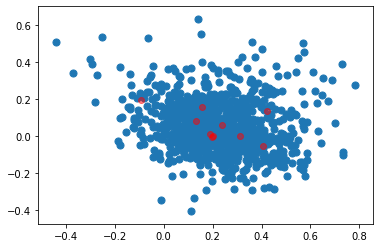

In [25]:
plt.scatter(X[:, 0], X[:, 1], s=50);# sprcify axis
centers = kmeans.cluster_centers_ # specefy cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha=0.5)#plot the centers on top
plt.show()#show the plot


** Excercise 3 - Topic Modelling again**

- Discover what are the topics (20) using LDA of the sascat dataset
- Discover what are the 20 most common nouns in the sascat dataset(of course after cleaning your text)
- Please comment on the comparision of topic-modelling to the naive approach?

In [28]:
import codecs, os
content = []
doc = open("/Users/Ashrakat/Desktop/sascat_excerpt.tsv","r").read().strip().split("\n")
for line in doc[2:]:
            sent = line.split("\t")[10]
            sent = nlp_pipeline(sent)
            if len(sent)>1:
                content.append(sent)

In [29]:
from gensim import corpora, models

# for running LDA in gensim we need a dictionary of all the words
dictionary = corpora.Dictionary(content)

# and to count the word frequency in each doc
X = [dictionary.doc2bow(text) for text in content]

print ("ready!")

ready!


In [30]:
ldamodel = models.ldamodel.LdaModel(X, num_topics=20, id2word = dictionary, iterations=500)
print ("done!")

done!


In [31]:
for topic in ldamodel.print_topics(num_words=7):
    print (topic)

(0, '0.020*"sec" + 0.014*"secretary" + 0.014*"primary" + 0.014*"institution" + 0.014*"nato" + 0.014*"assistance" + 0.014*"direct"')
(1, '0.033*"government" + 0.031*"assistance" + 0.025*"belarus" + 0.016*"support" + 0.014*"country" + 0.012*"provide" + 0.012*"fund"')
(2, '0.025*"country" + 0.025*"new" + 0.025*"york" + 0.013*"assistance" + 0.013*"foreign" + 0.013*"sec" + 0.013*"amount"')
(3, '0.030*"state" + 0.018*"belarus" + 0.018*"united" + 0.016*"president" + 0.012*"government" + 0.012*"sec" + 0.011*"program"')
(4, '0.022*"defense" + 0.019*"military" + 0.017*"fund" + 0.016*"president" + 0.015*"force" + 0.014*"government" + 0.011*"foreign"')
(5, '0.014*"assistance" + 0.014*"prohibit" + 0.014*"country" + 0.014*"sec" + 0.014*"use" + 0.014*"provide" + 0.014*"fund"')
(6, '0.023*"plo" + 0.014*"sec" + 0.012*"assistance" + 0.012*"prohibit" + 0.012*"president" + 0.012*"certain" + 0.012*"unless"')
(7, '0.026*"sanction" + 0.023*"act" + 0.022*"cuba" + 0.021*"president" + 0.021*"country" + 0.016*"a

In [32]:
import pandas as pd

data = pd.read_csv('/Users/Ashrakat/Desktop/sascat_excerpt.tsv',delimiter="\t") 
data.head()


id-snippet  n-sentences  n-words  n-nouns  n-adj  n-verbs  n-entities  \
0  hr5114-101.1           20      839      441     83       87          76   
1  hr5114-101.2            5      159       77     21       21           9   
2  hr5114-101.3            1       56       29      4        5           3   
3  hr5114-101.4            1      110       49     14       12          11   
4  hr5114-101.5            1       27       13      1        6           2   

   n-vague  n-concrete  n-conditionals  \
0        3           4               5   
1        2           1               1   
2        2           1               1   
3        1           0               2   
4        1           0               0   

                                         Unnamed: 10  
0  Provides for the enforcement of all provisions...  
1  Requires the delivery of excess defense articl...  
2  Prohibits making available any ESF or foreign ...  
3  Prohibits the obligation of funds for the Euro...  
4  Prohibits assistance to countries which fail t...

In [33]:
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    text=text.lower()
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
   
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]
    
        # pos tagger
    text = nltk.pos_tag(text)

    return text


In [34]:
data['clean'] = data['Unnamed: 10'].astype(str)
data['clean'] = data['clean'].apply(nlp_pipeline)

In [35]:
data.head()

id-snippet  n-sentences  n-words  n-nouns  n-adj  n-verbs  n-entities  \
0  hr5114-101.1           20      839      441     83       87          76   
1  hr5114-101.2            5      159       77     21       21           9   
2  hr5114-101.3            1       56       29      4        5           3   
3  hr5114-101.4            1      110       49     14       12          11   
4  hr5114-101.5            1       27       13      1        6           2   

   n-vague  n-concrete  n-conditionals  \
0        3           4               5   
1        2           1               1   
2        2           1               1   
3        1           0               2   
4        1           0               0   

                                         Unnamed: 10  \
0  Provides for the enforcement of all provisions...   
1  Requires the delivery of excess defense articl...   
2  Prohibits making available any ESF or foreign ...   
3  Prohibits the obligation of funds for the Euro...   
4  Prohibits assistance to countries which fail t...   

                                               clean  
0  [(provides, VBZ), (enforcement, NN), (provisio...  
1  [(requires, VBZ), (delivery, NN), (excess, JJ)...  
2  [(prohibits, NNS), (making, VBG), (available, ...  
3  [(prohibits, NNS), (obligation, NN), (funds, N...  
4  [(prohibits, NNS), (assistance, NN), (countrie...

In [36]:
data.clean = data.clean.apply(lambda x: [(t[0],) for t in x if t[1]=='NN' or t[1]=='NOUN'])


In [37]:
data["clean"] = [','.join(map(str, l)) for l in data["clean"]]
data.head()

id-snippet  n-sentences  n-words  n-nouns  n-adj  n-verbs  n-entities  \
0  hr5114-101.1           20      839      441     83       87          76   
1  hr5114-101.2            5      159       77     21       21           9   
2  hr5114-101.3            1       56       29      4        5           3   
3  hr5114-101.4            1      110       49     14       12          11   
4  hr5114-101.5            1       27       13      1        6           2   

   n-vague  n-concrete  n-conditionals  \
0        3           4               5   
1        2           1               1   
2        2           1               1   
3        1           0               2   
4        1           0               0   

                                         Unnamed: 10  \
0  Provides for the enforcement of all provisions...   
1  Requires the delivery of excess defense articl...   
2  Prohibits making available any ESF or foreign ...   
3  Prohibits the obligation of funds for the Euro...   
4  Prohibits assistance to countries which fail t...   

                                               clean  
0  ('enforcement',),('law',),('support',),('terro...  
1  ('delivery',),('defense',),('flank',),('priori...  
2  ('financing',),('assistance',),('kenya',),('pr...  
3  ('obligation',),('bank',),('reconstruction',),...  
4       ('assistance',),('illicit',),('government',)

In [38]:
def stringsonly(text):
    text = text.replace(',', '')
    text = text.replace(')', '')
    text = text.replace('(', '')
    text = text.replace("''", ' ')
    text = text.replace("'", ' ')
    return text

data['clean'] = data['clean'].apply(stringsonly)
data.head()

id-snippet  n-sentences  n-words  n-nouns  n-adj  n-verbs  n-entities  \
0  hr5114-101.1           20      839      441     83       87          76   
1  hr5114-101.2            5      159       77     21       21           9   
2  hr5114-101.3            1       56       29      4        5           3   
3  hr5114-101.4            1      110       49     14       12          11   
4  hr5114-101.5            1       27       13      1        6           2   

   n-vague  n-concrete  n-conditionals  \
0        3           4               5   
1        2           1               1   
2        2           1               1   
3        1           0               2   
4        1           0               0   

                                         Unnamed: 10  \
0  Provides for the enforcement of all provisions...   
1  Requires the delivery of excess defense articl...   
2  Prohibits making available any ESF or foreign ...   
3  Prohibits the obligation of funds for the Euro...   
4  Prohibits assistance to countries which fail t...   

                                               clean  
0   enforcement law support terrorism president c...  
1   delivery defense flank priority delivery expe...  
2   financing assistance kenya president congress...  
3   obligation bank reconstruction development pr...  
4                     assistance illicit government

In [39]:
for topic in ldamodel.print_topics(num_words=7):
    print (topic)
print("Naive Approach",Counter(" ".join(data["clean"]).split()).most_common(20))

(0, '0.020*"sec" + 0.014*"secretary" + 0.014*"primary" + 0.014*"institution" + 0.014*"nato" + 0.014*"assistance" + 0.014*"direct"')
(1, '0.033*"government" + 0.031*"assistance" + 0.025*"belarus" + 0.016*"support" + 0.014*"country" + 0.012*"provide" + 0.012*"fund"')
(2, '0.025*"country" + 0.025*"new" + 0.025*"york" + 0.013*"assistance" + 0.013*"foreign" + 0.013*"sec" + 0.013*"amount"')
(3, '0.030*"state" + 0.018*"belarus" + 0.018*"united" + 0.016*"president" + 0.012*"government" + 0.012*"sec" + 0.011*"program"')
(4, '0.022*"defense" + 0.019*"military" + 0.017*"fund" + 0.016*"president" + 0.015*"force" + 0.014*"government" + 0.011*"foreign"')
(5, '0.014*"assistance" + 0.014*"prohibit" + 0.014*"country" + 0.014*"sec" + 0.014*"use" + 0.014*"provide" + 0.014*"fund"')
(6, '0.023*"plo" + 0.014*"sec" + 0.012*"assistance" + 0.012*"prohibit" + 0.012*"president" + 0.012*"certain" + 0.012*"unless"')
(7, '0.026*"sanction" + 0.023*"act" + 0.022*"cuba" + 0.021*"president" + 0.021*"country" + 0.016*"a

** Excercise 4 - Clustering**

1. Use the k-means clustering (10) method on the sascat_excerpt dataset
2. Please comment on what you think is the main difference between Clustering and Topic Modelling
3. Please compare the results between clustering and topic modelling, for which type of research questions would these results be suitable

Try visualizing both maybe it will help!



In [154]:
# i'm re-loading everything here, because I want to use the titles of the articles to interpret the clusters
dataset = codecs.open("/Users/Ashrakat/Desktop/sascat_excerpt.tsv", "r", "utf-8").read().strip().split("\n")

#lets check an article out!
article = dataset[10].split("\t")
article=article[10]
article

"Amends the Foreign Assistance Act of 1961 to require an additional section in the President's international narcotics control strategy report that: (1) identifies the five countries that exported the largest amount of pseudoephedrine, ephedrine, and phenylpropanolamine; (2) identifies the five countries that imported the largest amount of such chemicals and have the highest rate of diversion of such chemicals for the use in the illicit production of methamphetamine; and (3) includes an economic analysis of the total worldwide production of such chemicals compared to the legitimate demand for such chemicals. Withholds 50% of the U.S. assistance allocated each fiscal year for countries so identified unless the country has either cooperated fully with the United States or has taken adequate steps on its own to achieve full compliance with established United Nations goals and objectives, unless the vital national interests of the United States prevent withholding such funds. Requires the 

In [ ]:
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # pos tagger
    text = nltk.pos_tag(text)

    # lemmatizer
    text = [wordnet_lemmatizer.lemmatize(token.lower(),"v")if "V" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
    
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]
    
    text = " ".join(text)
    
    # the output is text
    return text

In [169]:
article="Amends the Foreign Assistance Act of 1961 to require an additional section in the President's international narcotics control strategy report that: (1) identifies the five countries that exported the largest amount of pseudoephedrine, ephedrine, and phenylpropanolamine; (2) identifies the five countries that imported the largest amount of such chemicals and have the highest rate of diversion of such chemicals for the use in the illicit production of methamphetamine; and (3) includes an economic analysis of the total worldwide production of such chemicals compared to the legitimate demand for such chemicals. Withholds 50% of the U.S. assistance allocated each fiscal year for countries so identified unless the country has either cooperated fully with the United States or has taken adequate steps on its own to achieve full compliance with established United Nations goals and objectives, unless the vital national interests of the United States prevent withholding such funds. Requires the Secretary of State to submit to Congress a comprehensive plan to address the diversion of chemicals to the illicit production of methamphetamine for each identified country for which the President has not submitted a certification of full cooperation"

text = nltk.word_tokenize(article)
print("tokenized text:", text)
print()

text = nltk.pos_tag(text)
print("pos-tagged text:", text)
print()

#whats happening here
# we have a lemmatization and lowering in one line
#lemmatize the first item (the word not the postag) for each word that has a postag
#also lemmatize the words that dont have a postag in the text
text = [wordnet_lemmatizer.lemmatize(token.lower(),"x")if "x" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
print("lemmatized text:", text)
print()

text = [token for token in text if token not in exclude and token.isalpha()]
print("no punctiation:", text)
print()

# remove stopwords - be careful with this step    
text = [token for token in text if token not in stop_word_list]
text = " ".join(text)
print("no stopwords:", text)


tokenized text: ['Amends', 'the', 'Foreign', 'Assistance', 'Act', 'of', '1961', 'to', 'require', 'an', 'additional', 'section', 'in', 'the', 'President', "'s", 'international', 'narcotics', 'control', 'strategy', 'report', 'that', ':', '(', '1', ')', 'identifies', 'the', 'five', 'countries', 'that', 'exported', 'the', 'largest', 'amount', 'of', 'pseudoephedrine', ',', 'ephedrine', ',', 'and', 'phenylpropanolamine', ';', '(', '2', ')', 'identifies', 'the', 'five', 'countries', 'that', 'imported', 'the', 'largest', 'amount', 'of', 'such', 'chemicals', 'and', 'have', 'the', 'highest', 'rate', 'of', 'diversion', 'of', 'such', 'chemicals', 'for', 'the', 'use', 'in', 'the', 'illicit', 'production', 'of', 'methamphetamine', ';', 'and', '(', '3', ')', 'includes', 'an', 'economic', 'analysis', 'of', 'the', 'total', 'worldwide', 'production', 'of', 'such', 'chemicals', 'compared', 'to', 'the', 'legitimate', 'demand', 'for', 'such', 'chemicals', '.', 'Withholds', '50', '%', 'of', 'the', 'U.S.', '

In [132]:
dataset

['id-snippet\tn-sentences\tn-words\tn-nouns\tn-adj\tn-verbs\tn-entities\tn-vague\tn-concrete\tn-conditionals\t',
 "hr5114-101.1\t20\t839\t441\t83\t87\t76\t3\t4\t5\tProvides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against Iraq. Calls on the President to seek multilateral cooperation to: (1) deny dangerous technologies to Iraq; and (2) induce Iraq to respect internationally recognized human rights and to allow international humanitarian and human rights organizations to have access to Iraq and Kuwait. Prohibits, as part of the sanctions against Iraq: (1) any sales to Iraq under the Arms Export Control Act; (2) the issuance of licenses for the export to Iraq of items on the U.S. Munitions List; (3) exports to Iraq of certain goods or technology listed under the Export Administration Act of 1979; (4) the issuance of licenses of authorizations under the Atomic Energy Act of 19

In [139]:

corpus = []
corpus1 =  []
titles=[]

# you can run wit all data at home
for line in dataset[1:1000]:
    # to better understands which clusters are created, let's check the titles of the articles
    text1 = line.split("\t")[10]
    text = line.split("\t")[10]
    text = text_embedding(text)
    title=line.split("\t")[0]
    
    if len(text)>0:
        corpus.append(text1)
        corpus1.append(text)
        titles.append(title)
print ("ready!")

ready!


In [140]:
corpus1

[[0.1748707294998109,
  -0.1210966054150129,
  0.125832620149146,
  -0.05897324980905337,
  0.10334493118848052,
  0.013307586864112889,
  0.07868030826222164,
  -0.2274853265157076,
  0.47200094761700256,
  -0.12278909937973238,
  0.13835648084938884,
  0.05436388754577167,
  -0.12077068214792971,
  -0.08692786123886671,
  0.14169536492969872,
  0.29670184260795285,
  0.15329028933825964,
  -0.14965732297894702,
  0.3154501639832722,
  -0.09642512939915487,
  0.4215765461809769,
  -0.005552147981292253,
  0.01714687055594284,
  -0.4426848310556689,
  -0.2629168046190145,
  -1.4930965417333455,
  0.1484607354905005,
  -0.29819691643367235,
  0.2445655279353852,
  0.2450116215661447,
  2.6568432205771035,
  0.1154843630472512,
  -0.6375662728105974,
  -0.5479582375989117,
  -0.08758522443563599,
  -0.004910242620707871,
  -0.0001580773653782543,
  -0.08092168079317846,
  -0.5223324217660238,
  0.049640568358144656,
  -0.24896248864340248,
  -0.1033931900131709,
  0.5924646274406168,
  -

In [141]:
from sklearn.cluster import KMeans

# usual thing, np arrays
X = np.array(corpus1)
y = np.array(corpus) 

# we define kmeans, with 10 clusters (you can change this number and see how the results change)
# then we train it using only the documents
kmeans = KMeans(n_clusters=10).fit(X)

In [142]:
corpus[1]

"Requires the delivery of excess defense articles to NATO allies and major non-NATO allies on the southern and southeastern flank of NATO to be given priority over the delivery of such articles to other countries. Prohibits, six months after this Act's enactment, the expenditure of funds made available pursuant to this Act to provide assistance to Yugoslavia. Directs the Secretary of the Treasury to instruct the U.S. executive directors to international financial institutions to oppose any assistance to Yugoslavia. Exempts from such prohibition assistance to support democratic parties or movements and emergency and humanitarian assistance. Makes such prohibition inapplicable if: (1) all the individual republics of Yugoslavia have held free and fair elections and are not engaged in a pattern of human rights violations; or (2) the Secretary of State certifies that Yugoslavia is making significant strides toward complying with the Helsinki Accords and is encouraging any republic which has

In [143]:
for i in range(10):
    
    # print the title of the document if the doc is in this cluster
    print ("this is cluster number",i)
    
    # then you loop over all titles
    for k in range(len(titles)):
        
        # this is the title
        title = titles[k]
        
        #this is its cluster label
        label = kmeans.labels_[k]
        
        # does it belong to this cluster?
        if i == label:
            #if yes, then print it out!
            print (title)
    print (" ")

this is cluster number 0
hr5114-101.7
hjres2-108.24
hjres2-108.30
hr3610-104.6
hr3610-104.7
hr3610-104.9
hr5368-102.2
hr5368-102.16
 
this is cluster number 1
hr5114-101.4
hjres2-108.35
hjres2-108.36
hr3610-104.4
hr2494-101.1
hr2494-101.3
hr5368-102.5
hr5368-102.6
 
this is cluster number 2
hr5114-101.6
hr3199-109.1
hjres2-108.8
hjres2-108.9
hjres2-108.15
hjres2-108.17
hjres2-108.27
hjres2-108.28
hjres2-108.31
hr3610-104.1
hr3610-104.3
hr3610-104.16
hr5006-102.4
hr5006-102.5
hr5368-102.4
hr5368-102.12
hr5368-102.14
hr5368-102.19
 
this is cluster number 3
hr5114-101.8
hjres2-108.1
hjres2-108.16
hjres2-108.18
hjres2-108.19
hjres2-108.20
hjres2-108.23
hjres2-108.25
hjres2-108.32
hjres2-108.38
hr3610-104.12
hr3610-104.14
hr4775-107.2
hr4775-107.3
hr5006-102.6
hr5368-102.9
 
this is cluster number 4
hr5114-101.1
hr5114-101.5
hjres2-108.3
hjres2-108.6
hr3610-104.8
hr5006-102.1
hr5006-102.2
hr5368-102.1
hr5368-102.7
hr5368-102.10
hr5368-102.11
 
this is cluster number 5
hr5114-101.2
hr5114-1

In [148]:
 #let's count which are the most popular words in the titles of each cluster
from collections import Counter

for i in range(10):
    
    # we create a list where we put the words from the corpus
    content_words = []
    
    print ("this is cluster number",i)
    for k in range(len(corpus)):
        # we clean the corpus with our pipeline
        content = nlp_pipeline(corpus[k]).split(" ")
        label = kmeans.labels_[k]
        if i == label:
            # we put each word in the list
            for word in content:
                content_words.append(word)
    
    # then we count and print the 10 most common
    most_common = Counter(content_words).most_common(10)
    print (most_common)
    print (" ")

this is cluster number 0
[('assistance', 16), ('el', 14), ('military', 12), ('salvadoran', 9), ('government', 9), ('president', 8), ('settlement', 8), ('fail', 6), ('fund', 6), ('salvador', 5)]
 
this is cluster number 1
[('financial', 11), ('assistance', 10), ('government', 8), ('institution', 8), ('polish', 6), ('prohibit', 5), ('bank', 5), ('president', 5), ('debt', 5), ('poland', 5)]
 
this is cluster number 2
[('state', 18), ('assistance', 18), ('country', 18), ('fund', 15), ('foreign', 14), ('united', 14), ('act', 10), ('use', 9), ('unless', 9), ('president', 8)]
 
this is cluster number 3
[('assistance', 16), ('fund', 15), ('program', 12), ('sec', 11), ('president', 11), ('use', 11), ('provide', 10), ('government', 8), ('prohibit', 8), ('make', 8)]
 
this is cluster number 4
[('iraq', 45), ('assistance', 31), ('sanction', 26), ('country', 26), ('president', 26), ('act', 25), ('export', 19), ('united', 17), ('foreign', 14), ('technology', 13)]
 
this is cluster number 5
[('assist

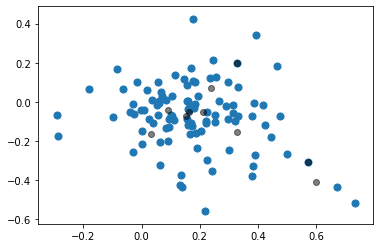

In [149]:
plt.scatter(X[:, 0], X[:, 1], s=50);
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5)
plt.show()

In [152]:
X.shape #checking the shape - I see I have 100 documents

(100, 50)